In [1]:
# import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import warnings as datawarnings
datawarnings.filterwarnings('ignore')
        

# Data preparation
**The breast cancer dataset consists of 569 observations and 30 continuous predictor variables.** 

**The binary outcome variable denotes the tumor's malignancy status.**

**There are no missing values in the data**



<u>Loads data:</u> 

Reads a CSV file into a Pandas DataFrame named df.

<u>Creates data protocol:</u> 

Generates Excel files to document the data's current state:

max_cancer.xlsx: Contains the maximum value for each numeric column.

min_cancer.xlsx: Contains the minimum value for each numeric column.

NA_cancer.xlsx: Shows the count of missing values in each column.

unique_cancer.xlsx: Shows the count of unique values in each column.



# Exploratory data analysis (EDA)

<u>Generates a report:</u> 

Uses autoviz to create an automated report and calculates basic statistics using .describe() .info().

<u> Histograms:</u> 

were generated for all continuous numerical features to visualize their distribution. 

<u> countplot:</u>

A countplot was created for the binary target variable (M or B) to understand its class balance.

<u> Correlation analysis:<u> 

Correlation coefficients were calculated between all numerical features and visualized using a heatmap to identify potential relationships.

<u> Distribution analysis:</u> 

The distribution of each numerical feature was examined. It was found that only four features exhibited a normal distribution, while the remaining features were non-normally distributed.

<u> Hypothesis testing:</u>

To determine if the values in each numerical feature were significantly different between the two classes of the target variable, a t-test was conducted for features with a normal distribution, and the Wilcoxon rank-sum test was conducted for the other features.

The significance tests indicate a significant separation between the groups based on the diagnostic variable in the majority of feature



# Data preparation

In [4]:
import dtale
df = pd.read_csv("cancer_data.csv")
df.drop(columns=['Unnamed: 32'], inplace=True)
dtale.show(df)
df.head(569)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

1. Create Data Protocol

In [6]:
# Type of valaues 
df.dtypes.to_excel("cancer_datatype.xlsx",
              sheet_name='data_type')

numeric_df = df.select_dtypes(include=['number'])
# Maximum valaues 
numeric_df.max().to_excel("max_cancer.xlsx",
             sheet_name='max')
# # Minimum Values
numeric_df.min().to_excel("min_cancer.xlsx",
              sheet_name='min')
# Missing Values
df.isnull().sum(axis=0).to_excel("NA_cancer.xlsx",
             sheet_name='NA')

# exporting results to the protocol
df.nunique().to_excel("unique_cancer.xlsx",
             sheet_name='unique')


# EDA

2. Create Automated reports

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (569, 32)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  30
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of

Number of All Scatter Plots = 465
Image size of 1500x87200 pixels is too large. It must be less than 2^16 in each direction.
Could not draw Pair Scatter Plots


ValueError: Image size of 1500x87200 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x87200 with 435 Axes>

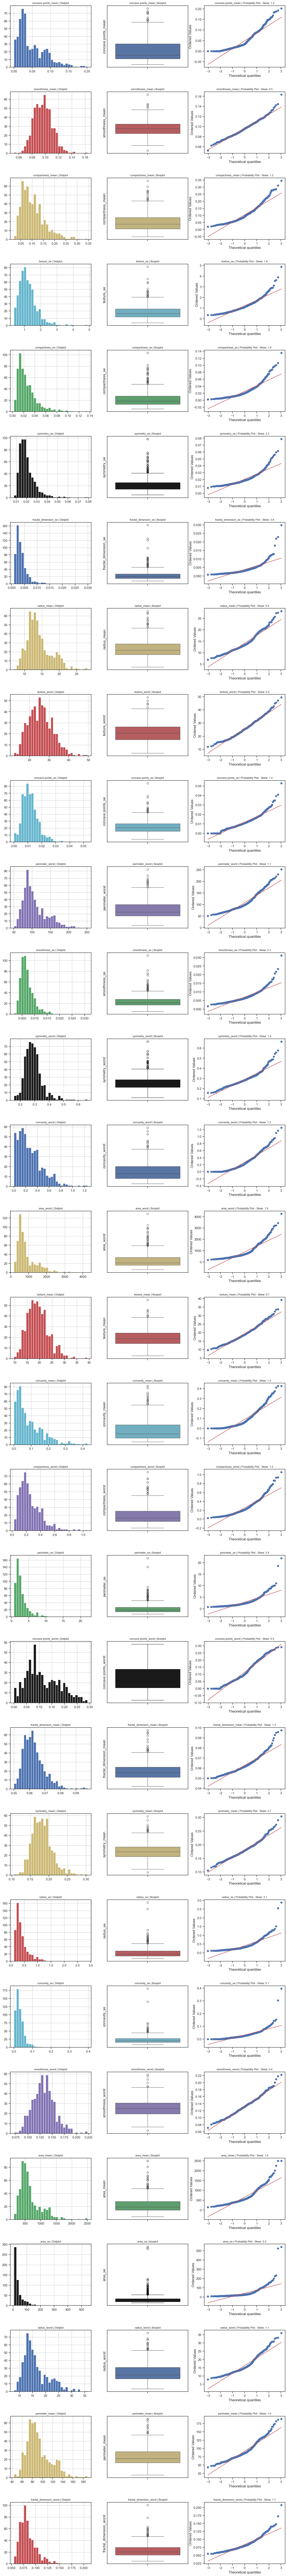

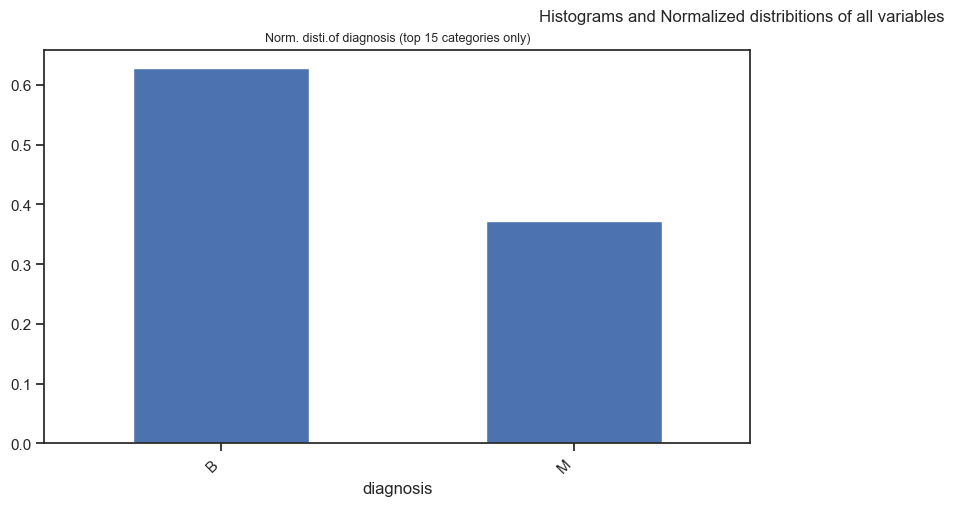

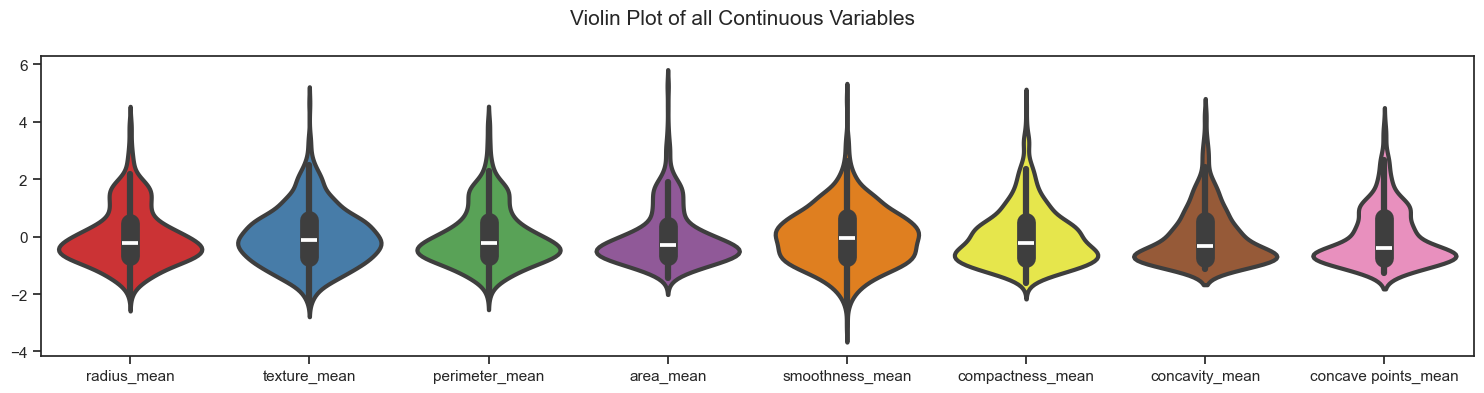

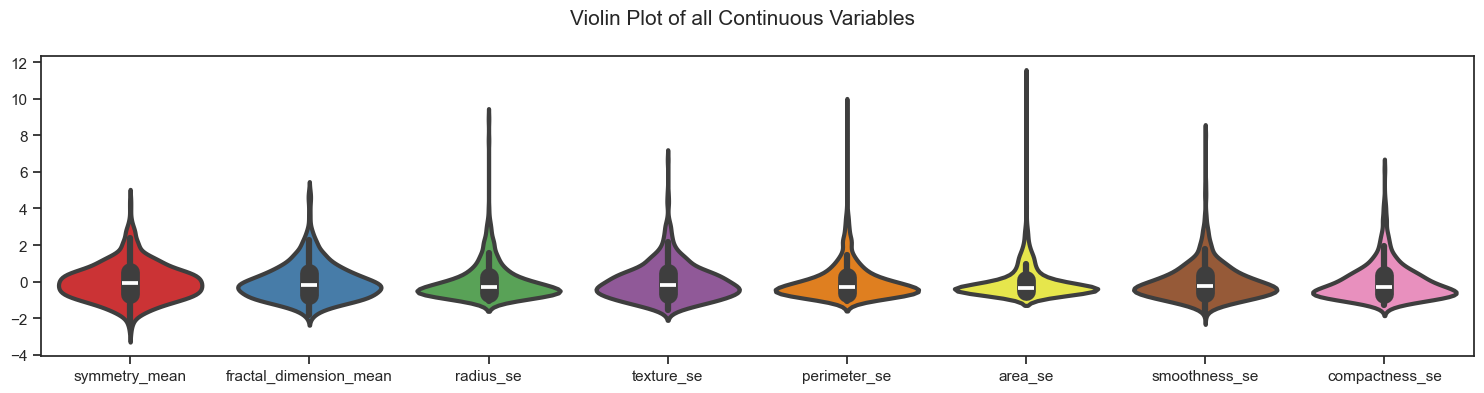

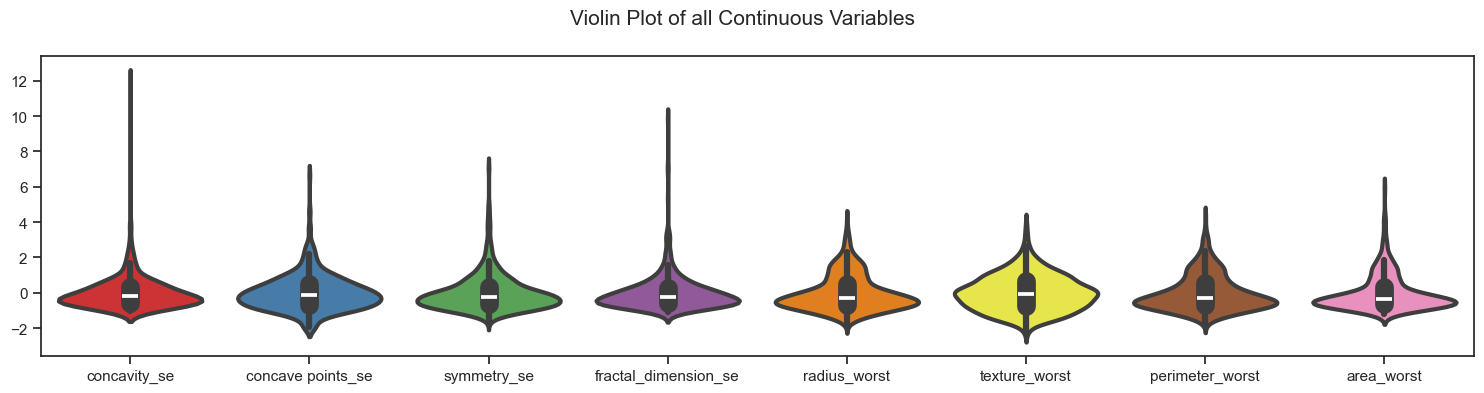

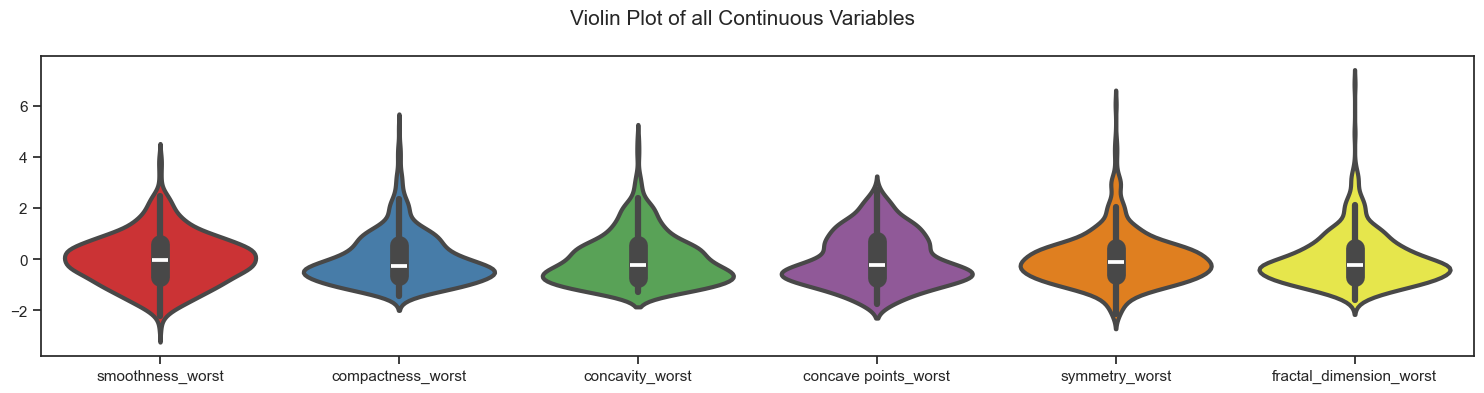

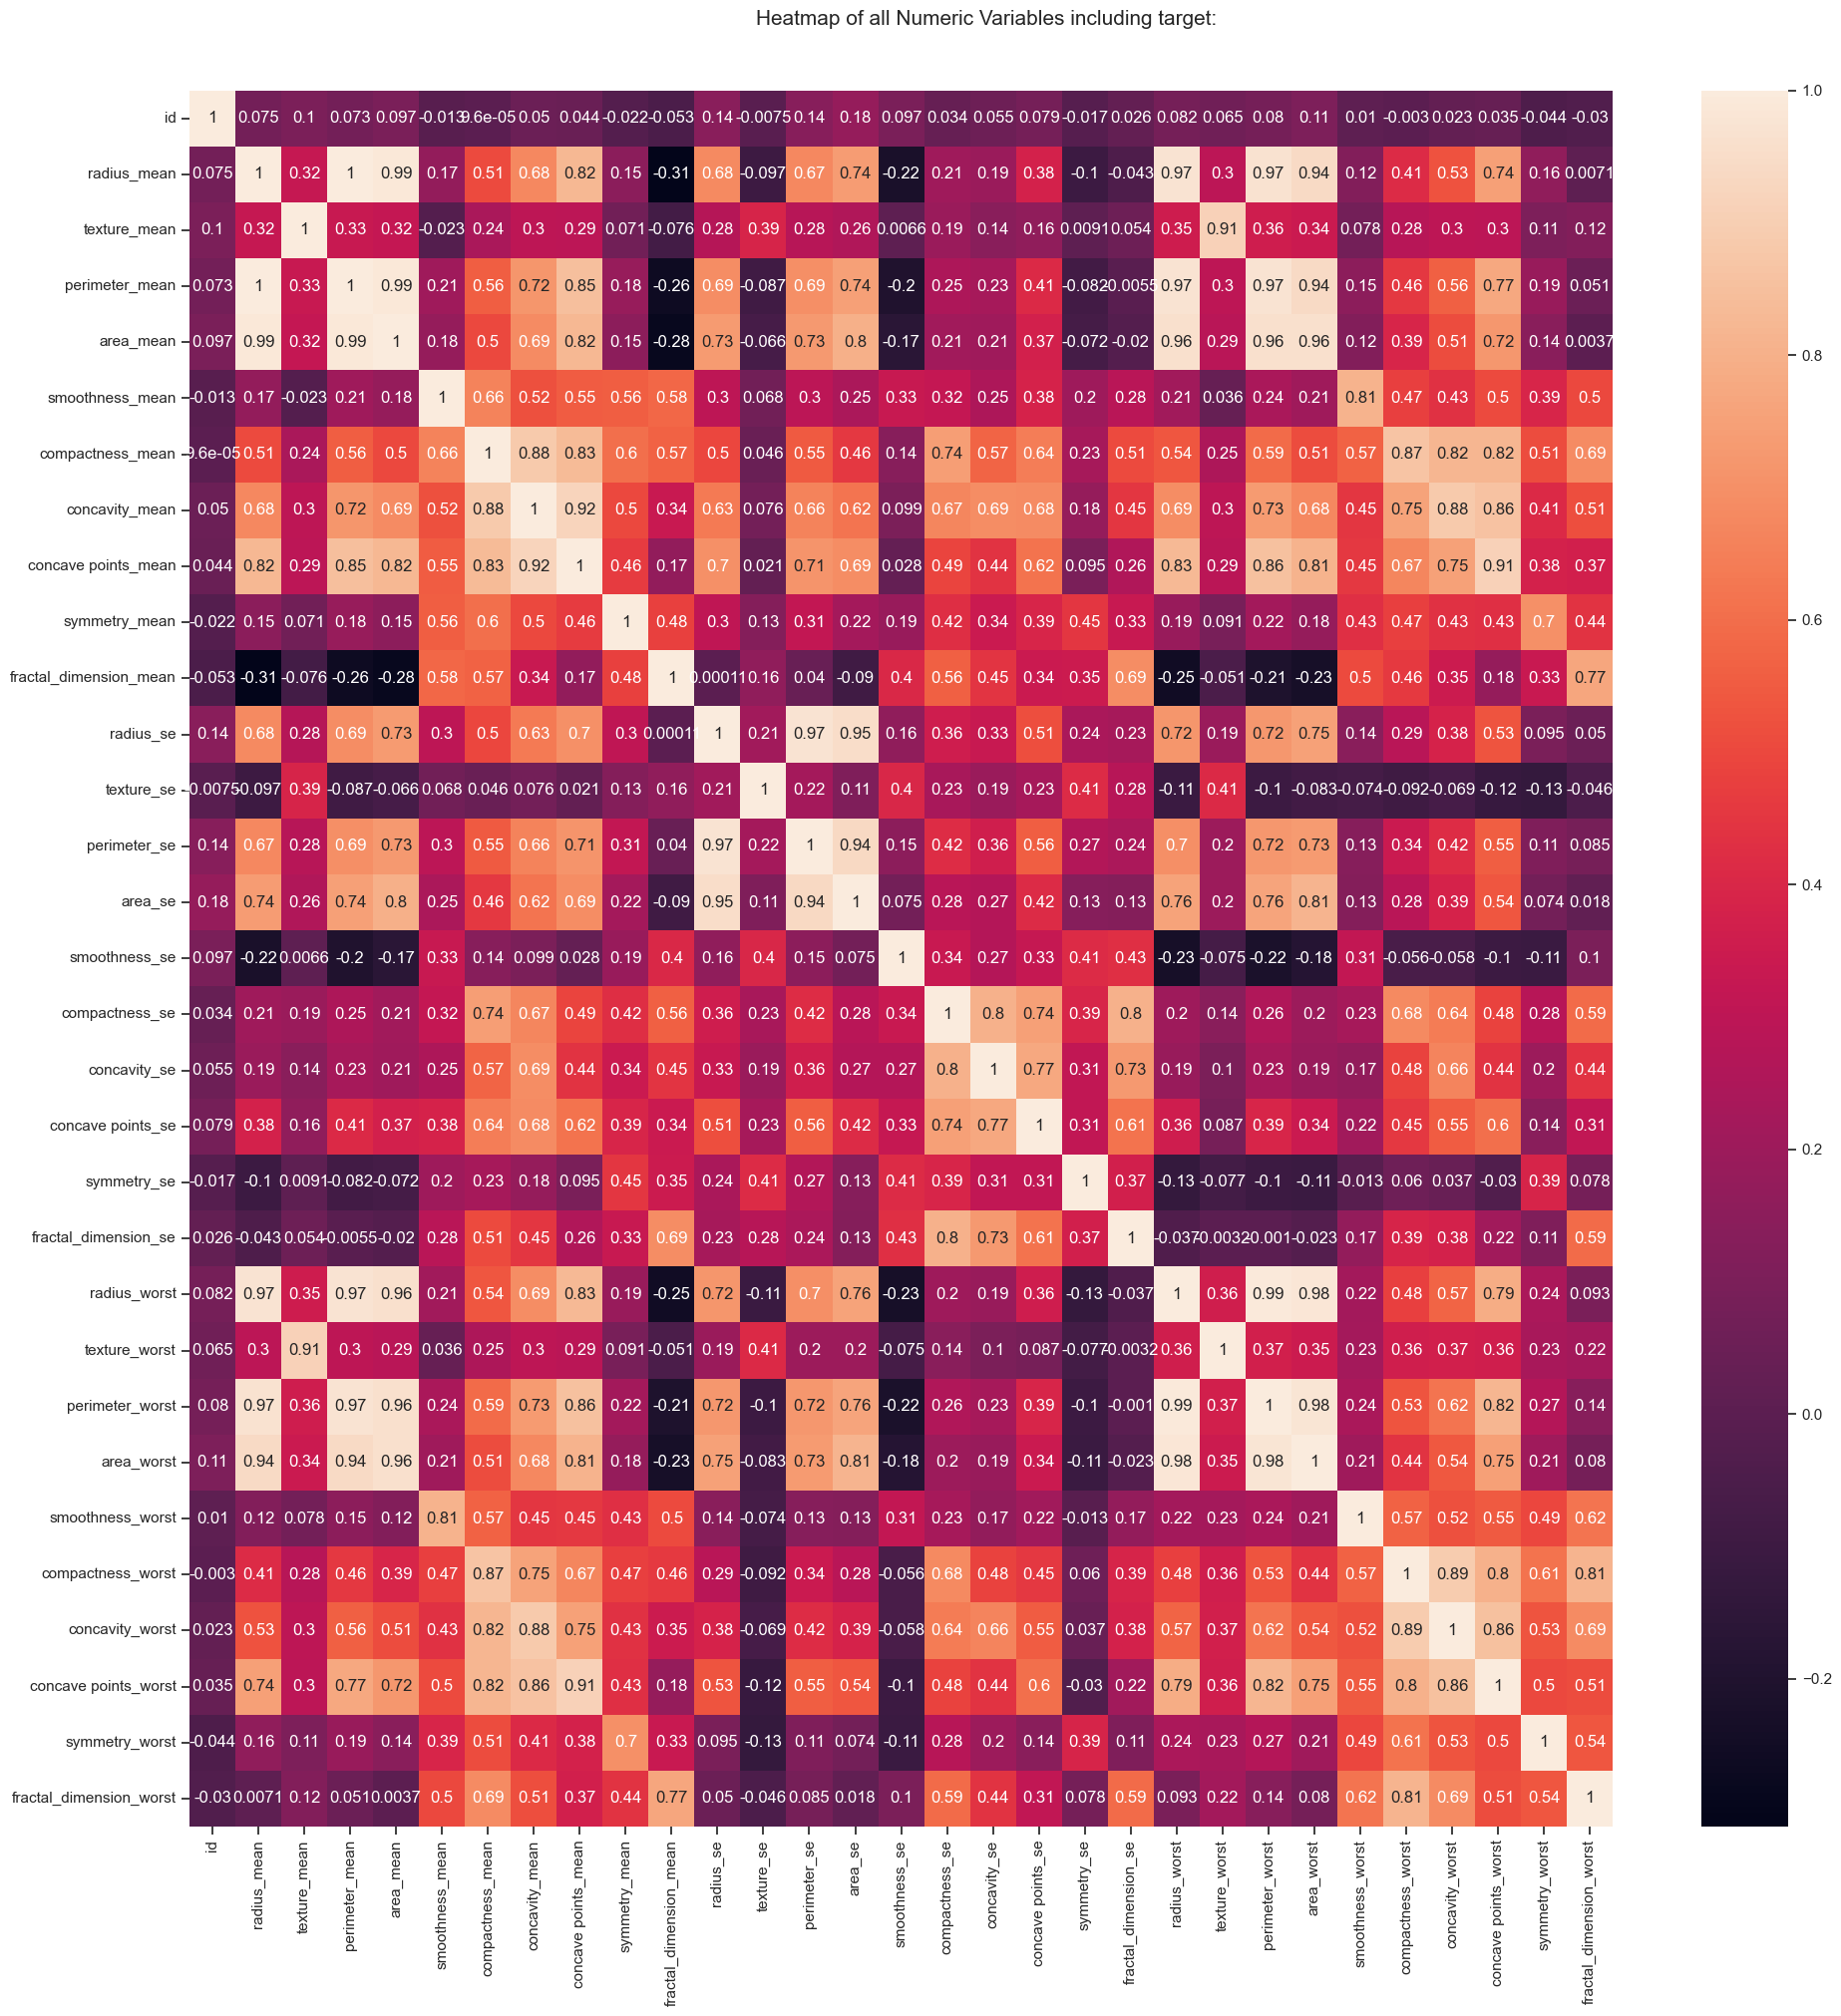

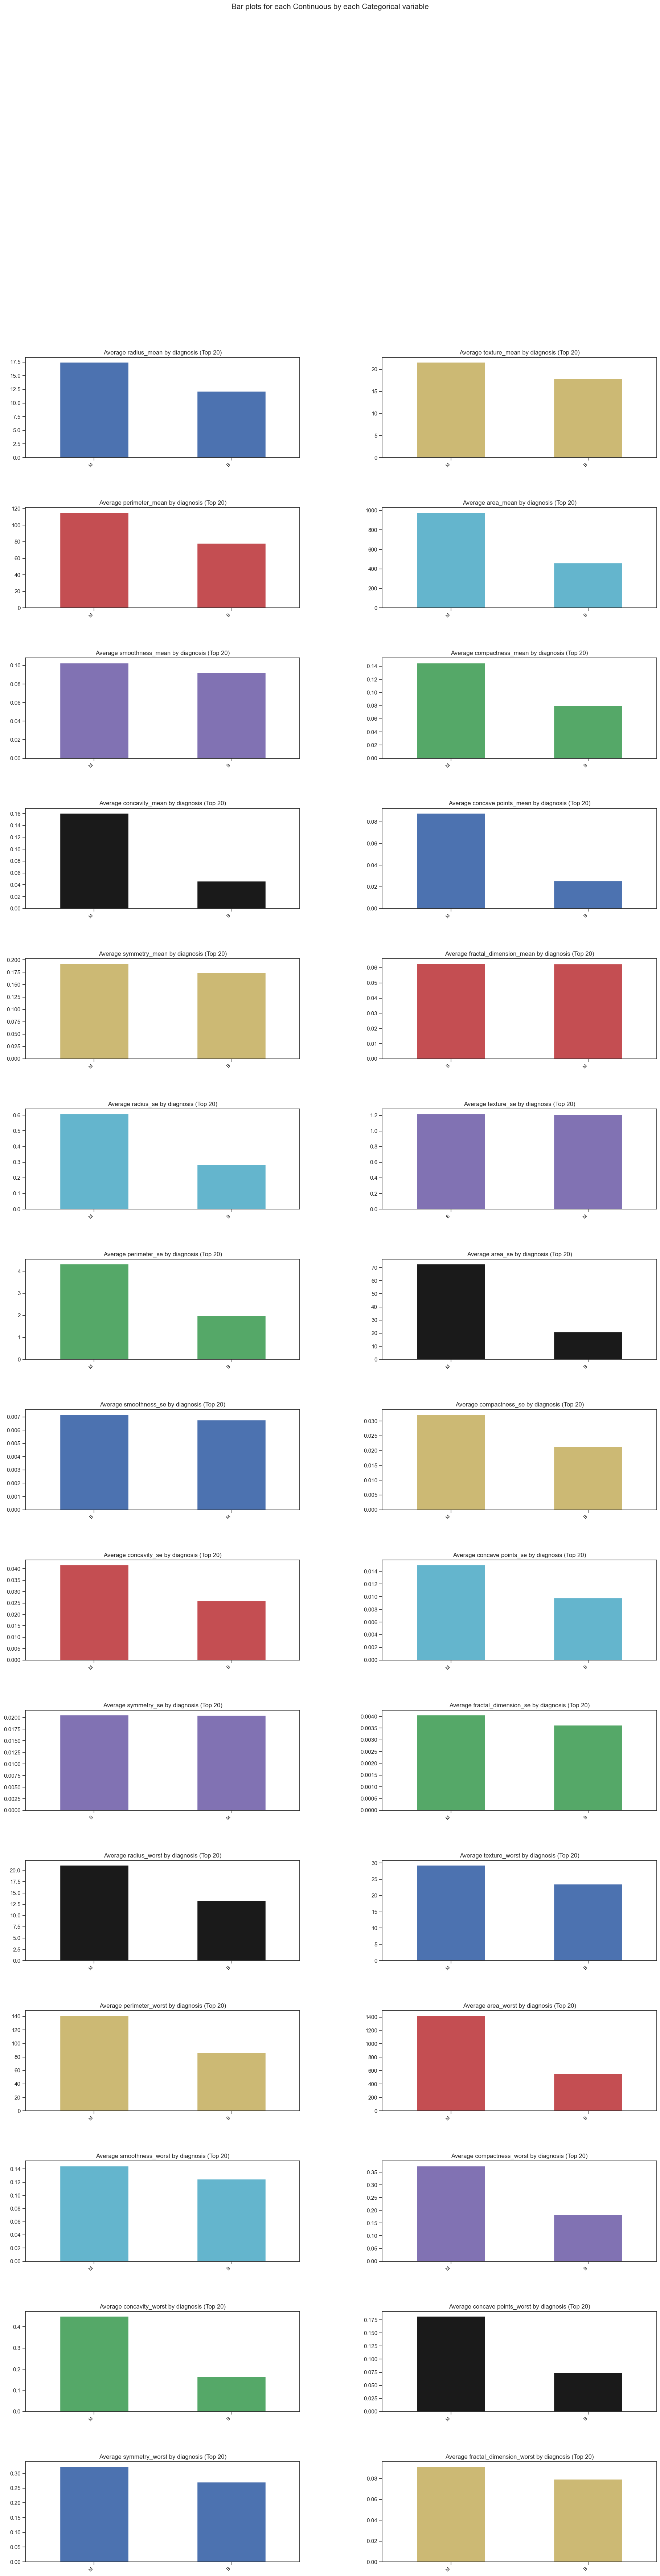

All Plots done
Time to run AutoViz = 40 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


id    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302      M        17.99         10.38         122.80       1001.0     
1      842517      M        20.57         17.77         132.90       1326.0     
2    84300903      M        19.69         21.25         130.00       1203.0     
3    84348301      M        11.42         20.38          77.58        386.1     
4    84358402      M        20.29         14.34         135.10       1297.0     
..        ...       ...          ...           ...             ...        ...   
564    926424      M        21.56         22.39         142.00       1479.0     
565    926682      M        20.13         28.25         131.20       1261.0     
566    926954      M        16.60         28.08         108.30        858.1     
567    927241      M        20.60         29.33         140.10       1265.0     
568     92751      B         7.76         24.54          47.92        181.0     

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0        0.11840           0.27760          0.30010           0.14710         
1        0.08474           0.07864          0.08690           0.07017         
2        0.10960           0.15990          0.19740           0.12790         
3        0.14250           0.28390          0.24140           0.10520         
4        0.10030           0.13280          0.19800           0.10430         
..               ...               ...             ...                  ...   
564      0.11100           0.11590          0.24390           0.13890         
565      0.09780           0.10340          0.14400           0.09791         
566      0.08455           0.10230          0.09251           0.05302         
567      0.11780           0.27700          0.35140           0.15200         
568      0.05263           0.04362          0.00000           0.00000         

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0       0.2419              0.07871          1.0950      0.9053     
1       0.1812              0.05667          0.5435      0.7339     
2       0.2069              0.05999          0.7456      0.7869     
3       0.2597              0.09744          0.4956      1.1560     
4       0.1809              0.05883          0.7572      0.7813     
..             ...                     ...        ...         ...   
564     0.1726              0.05623          1.1760      1.2560     
565     0.1752              0.05533          0.7655      2.4630     
566     0.1590              0.05648          0.4564      1.0750     
567     0.2397              0.07016          0.7260      1.5950     
568     0.1587              0.05884          0.3857      1.4280     

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0        8.589     153.40     0.006399         0.04904        0.05373     
1        3.398      74.08     0.005225         0.01308        0.01860     
2        4.585      94.03     0.006150         0.04006        0.03832     
3        3.445      27.23     0.009110         0.07458        0.05661     
4        5.438      94.44     0.011490         0.02461        0.05688     
..            ...      ...            ...             ...           ...   
564      7.673     158.70     0.010300         0.02891        0.05198     
565      5.203      99.04     0.005769         0.02423        0.03950     
566      3.425      48.55     0.005903         0.03731        0.04730     
567      5.772      86.22     0.006522         0.06158        0.07117     
568      2.548      19.15     0.007189         0.00466        0.00000     

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0         0.01587         0.03003          0.006193           25.380      
1         0.01340         0.01389          0.003532           24.990      
2         0.02058         0.02250          0.004571           23.570      
3         0.01867         0.05963          0.009208     

In [9]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz('', dfte=df)


## calculates basic statistics using .describe() .info().

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.describe()

id       radius_mean  texture_mean  perimeter_mean   area_mean   \
count  5.690000e+02  569.000000    569.000000     569.000000     569.000000   
mean   3.037183e+07   14.127292     19.289649      91.969033     654.889104   
std    1.250206e+08    3.524049      4.301036      24.298981     351.914129   
min    8.670000e+03    6.981000      9.710000      43.790000     143.500000   
25%    8.692180e+05   11.700000     16.170000      75.170000     420.300000   
50%    9.060240e+05   13.370000     18.840000      86.240000     551.100000   
75%    8.813129e+06   15.780000     21.800000     104.100000     782.700000   
max    9.113205e+08   28.110000     39.280000     188.500000    2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count    569.000000        569.000000       569.000000        569.000000        
mean       0.096360          0.104341         0.088799          0.048919        
std        0.014064          0.052813         0.079720          0.038803        
min        0.052630          0.019380         0.000000          0.000000        
25%        0.086370          0.064920         0.029560          0.020310        
50%        0.095870          0.092630         0.061540          0.033500        
75%        0.105300          0.130400         0.130700          0.074000        
max        0.163400          0.345400         0.426800          0.201200        

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count   569.000000          569.000000        569.000000  569.000000   
mean      0.181162            0.062798          0.405172    1.216853   
std       0.027414            0.007060          0.277313    0.551648   
min       0.106000            0.049960          0.111500    0.360200   
25%       0.161900            0.057700          0.232400    0.833900   
50%       0.179200            0.061540          0.324200    1.108000   
75%       0.195700            0.066120          0.478900    1.474000   
max       0.304000            0.097440          2.873000    4.885000   

       perimeter_se    area_se   smoothness_se  compactness_se  concavity_se  \
count   569.000000   569.000000   569.000000      569.000000     569.000000    
mean      2.866059    40.337079     0.007041        0.025478       0.031894    
std       2.021855    45.491006     0.003003        0.017908       0.030186    
min       0.757000     6.802000     0.001713        0.002252       0.000000    
25%       1.606000    17.850000     0.005169        0.013080       0.015090    
50%       2.287000    24.530000     0.006380        0.020450       0.025890    
75%       3.357000    45.190000     0.008146        0.032450       0.042050    
max      21.980000   542.200000     0.031130        0.135400       0.396000    

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count     569.000000      569.000000        569.000000        569.000000    
mean        0.011796        0.020542          0.003795         16.269190    
std         0.006170        0.008266          0.002646          4.833242    
min         0.000000        0.007882          0.000895          7.930000    
25%         0.007638        0.015160          0.002248         13.010000    
50%         0.010930        0.018730          0.003187         14.970000    
75%         0.014710        0.023480          0.004558         18.790000    
max         0.052790        0.078950          0.029840         36.040000    

       texture_worst  perimeter_worst  area_worst   smoothness_worst  \
count   569.000000      569.000000      569.000000     569.000000      
mean     25.677223      107.261213      880.583128       0.132369      
std       6.146258       33.602542      569.356993       0.022832      
min      12.020000       50.410000      185.200000       0.071170      
25%      21.080000       84.110000      515.300000       0.116600      
50%      25.410000       97.660000      686.500000       0.131300      
75

5. Create plots for each dataype (consider creating datasateset for each type first)

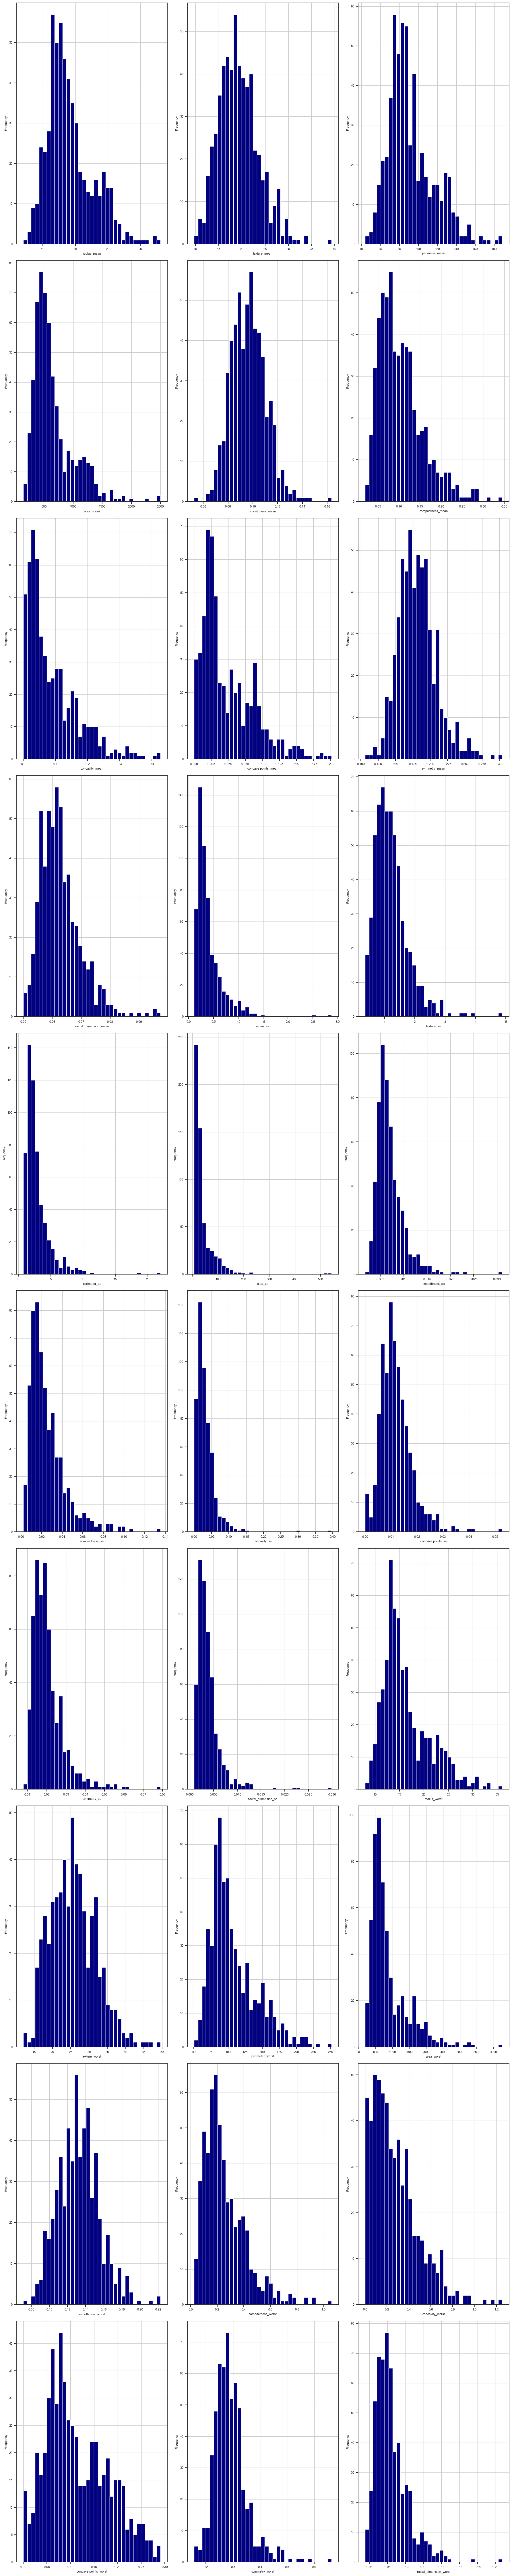

In [14]:
# df.set_index('id', inplace=True)
con_df = df.drop(columns=['diagnosis', 'id'])
cols = con_df.columns

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # ceil division to get number of rows

# Set up the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 9 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each column
for i, col in enumerate(cols):
    con_df[col].hist(ax=axes[i], bins=35, color='navy')
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# If there are any unused subplots, remove them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


6. Describe target value 

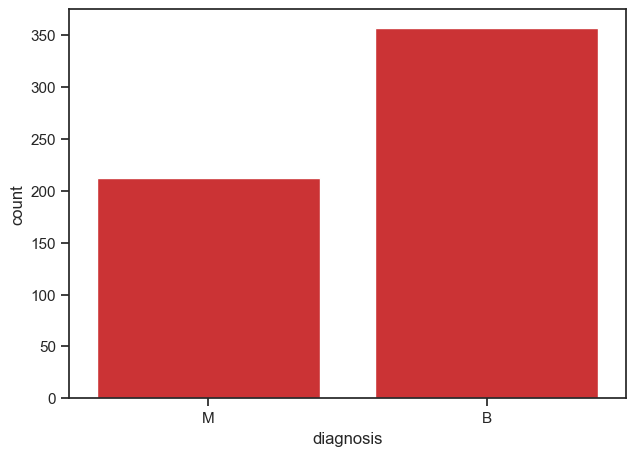

2024-08-30 22:43:19,153 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-08-30 22:43:19,162 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


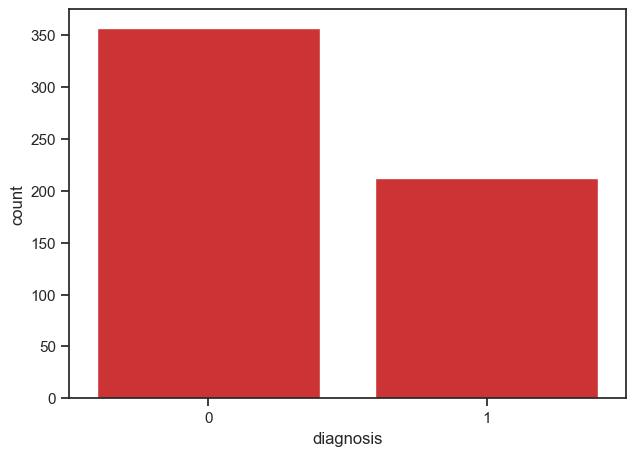

In [16]:
sb.countplot(x='diagnosis', data=df)
plt.show()
df['diagnosis'] = df['diagnosis'].astype('string')
df['diagnosis'] = pd.Categorical(df['diagnosis']).codes
sb.countplot(x='diagnosis', data=df)
plt.show()

7. Correlation

In [18]:
df2 = df.drop(columns=['id'])
df2.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000    0.730029      0.415185       0.742636      
radius_mean              0.730029    1.000000      0.323782       0.997855      
texture_mean             0.415185    0.323782      1.000000       0.329533      
perimeter_mean           0.742636    0.997855      0.329533       1.000000      
area_mean                0.708984    0.987357      0.321086       0.986507      
smoothness_mean          0.358560    0.170581     -0.023389       0.207278      
compactness_mean         0.596534    0.506124      0.236702       0.556936      
concavity_mean           0.696360    0.676764      0.302418       0.716136      
concave points_mean      0.776614    0.822529      0.293464       0.850977      
symmetry_mean            0.330499    0.147741      0.071401       0.183027      
fractal_dimension_mean  -0.012838   -0.311631     -0.076437      -0.261477      
radius_se                0.567134    0.679090      0.275869       0.691765      
texture_se              -0.008303   -0.097317      0.386358      -0.086761      
perimeter_se             0.556141    0.674172      0.281673       0.693135      
area_se                  0.548236    0.735864      0.259845       0.744983      
smoothness_se           -0.067016   -0.222600      0.006614      -0.202694      
compactness_se           0.292999    0.206000      0.191975       0.250744      
concavity_se             0.253730    0.194204      0.143293       0.228082      
concave points_se        0.408042    0.376169      0.163851       0.407217      
symmetry_se             -0.006522   -0.104321      0.009127      -0.081629      
fractal_dimension_se     0.077972   -0.042641      0.054458      -0.005523      
radius_worst             0.776454    0.969539      0.352573       0.969476      
texture_worst            0.456903    0.297008      0.912045       0.303038      
perimeter_worst          0.782914    0.965137      0.358040       0.970387      
area_worst               0.733825    0.941082      0.343546       0.941550      
smoothness_worst         0.421465    0.119616      0.077503       0.150549      
compactness_worst        0.590998    0.413463      0.277830       0.455774      
concavity_worst          0.659610    0.526911      0.301025       0.563879      
concave points_worst     0.793566    0.744214      0.295316       0.771241      
symmetry_worst           0.416294    0.163953      0.105008       0.189115      
fractal_dimension_worst  0.323872    0.007066      0.119205       0.051019      

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                0.708984      0.358560          0.596534       
radius_mean              0.987357      0.170581          0.506124       
texture_mean             0.321086     -0.023389          0.236702       
perimeter_mean           0.986507      0.207278          0.556936       
area_mean                1.000000      0.177028          0.498502       
smoothness_mean          0.177028      1.000000          0.659123       
compactness_mean         0.498502      0.659123          1.000000       
concavity_mean           0.685983      0.521984          0.883121       
concave points_mean      0.823269      0.553695          0.831135       
symmetry_mean            0.151293      0.557775          0.602641       
fractal_dimension_mean  -0.283110      0.584792          0.565369       
radius_se                0.732562      0.301467          0.497473       
texture_se              -0.066280      0.068406          0.046205       
perimeter_se             0.726628      0.296092          0.548905       
area_se                  0.800086      0.246552          0.455653       
smoothness_se           -0.166777      0.332375          0.135299       
compactness_se           0.212583      0.318943          0.738722       
concavity_se             0.207660      0.248396          0.570517       
concave points_se        0.372320      0.3806

8. t-Test for 'diagnosis'

<Axes: >

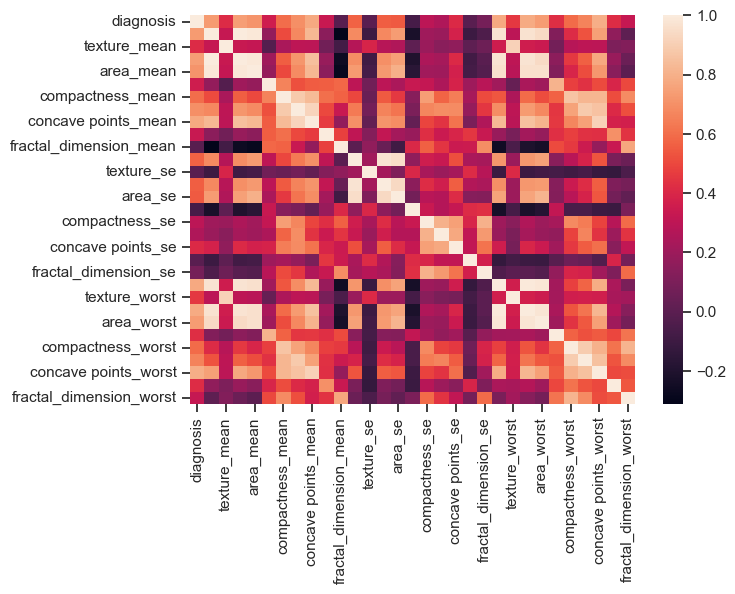

In [20]:
sb.heatmap(df2.corr())

In [21]:
# skewness
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    else:
       return default  
pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

## parametric features - use the t-test



smoothness_mean:
t-statistic: 9.146098808149038
p-value: 1.0518503592032013e-18


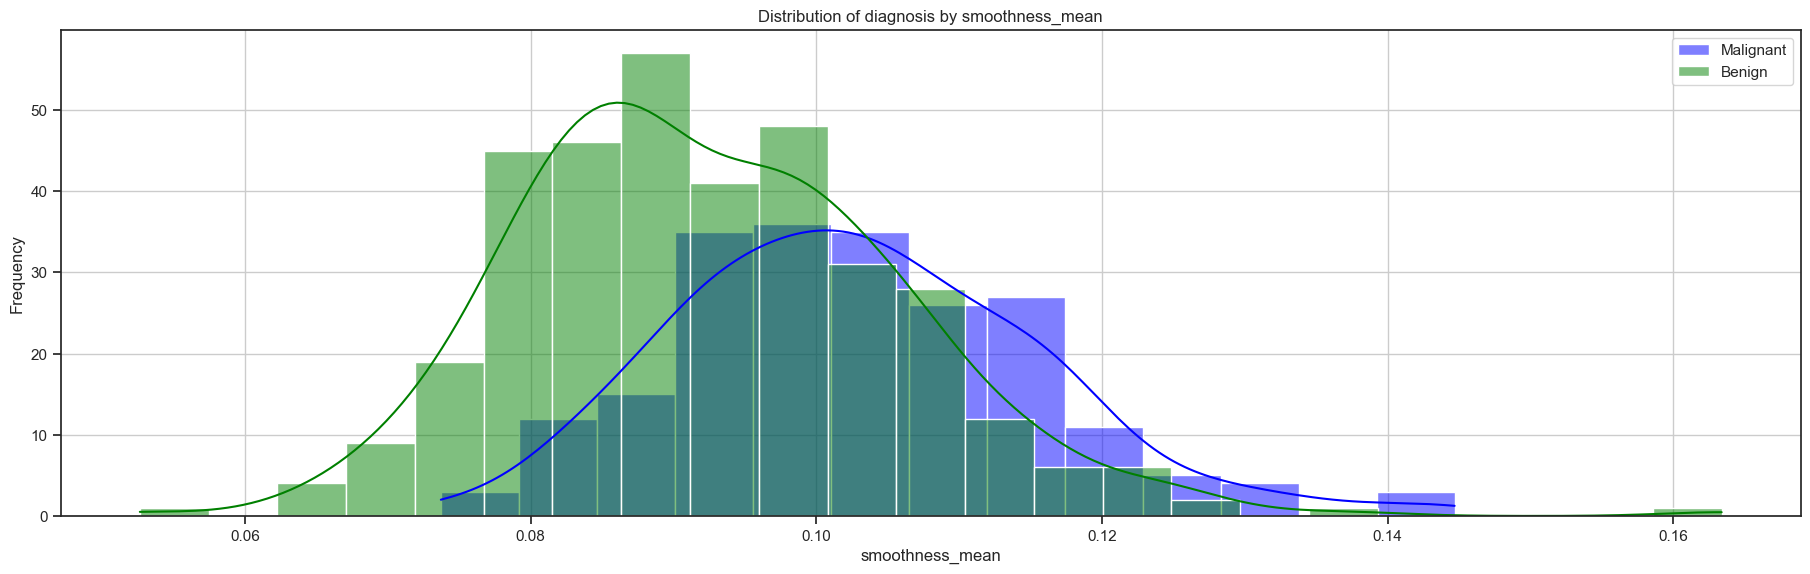



texture_worst:
t-statistic: 12.23098134599393
p-value: 1.0780574879494241e-30


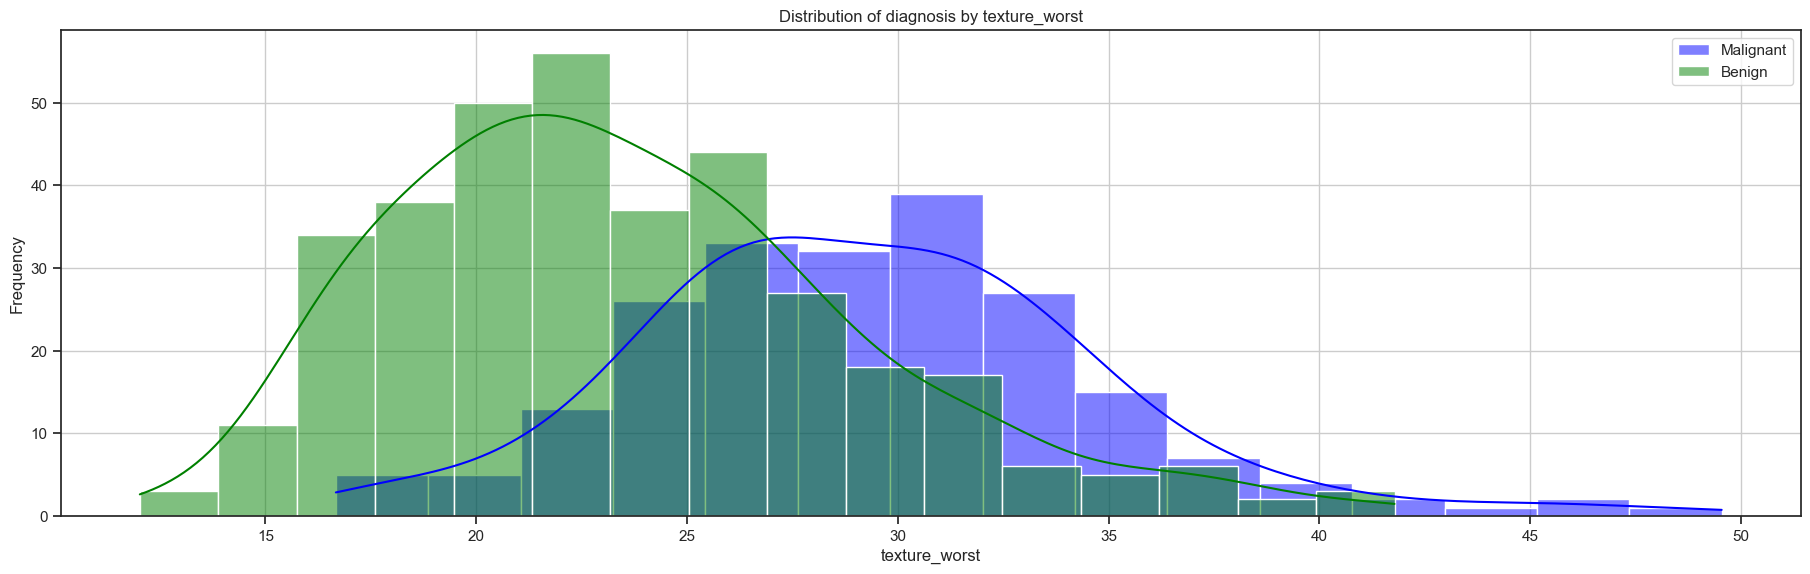



smoothness_worst:
t-statistic: 11.066746606769504
p-value: 6.575143633984769e-26


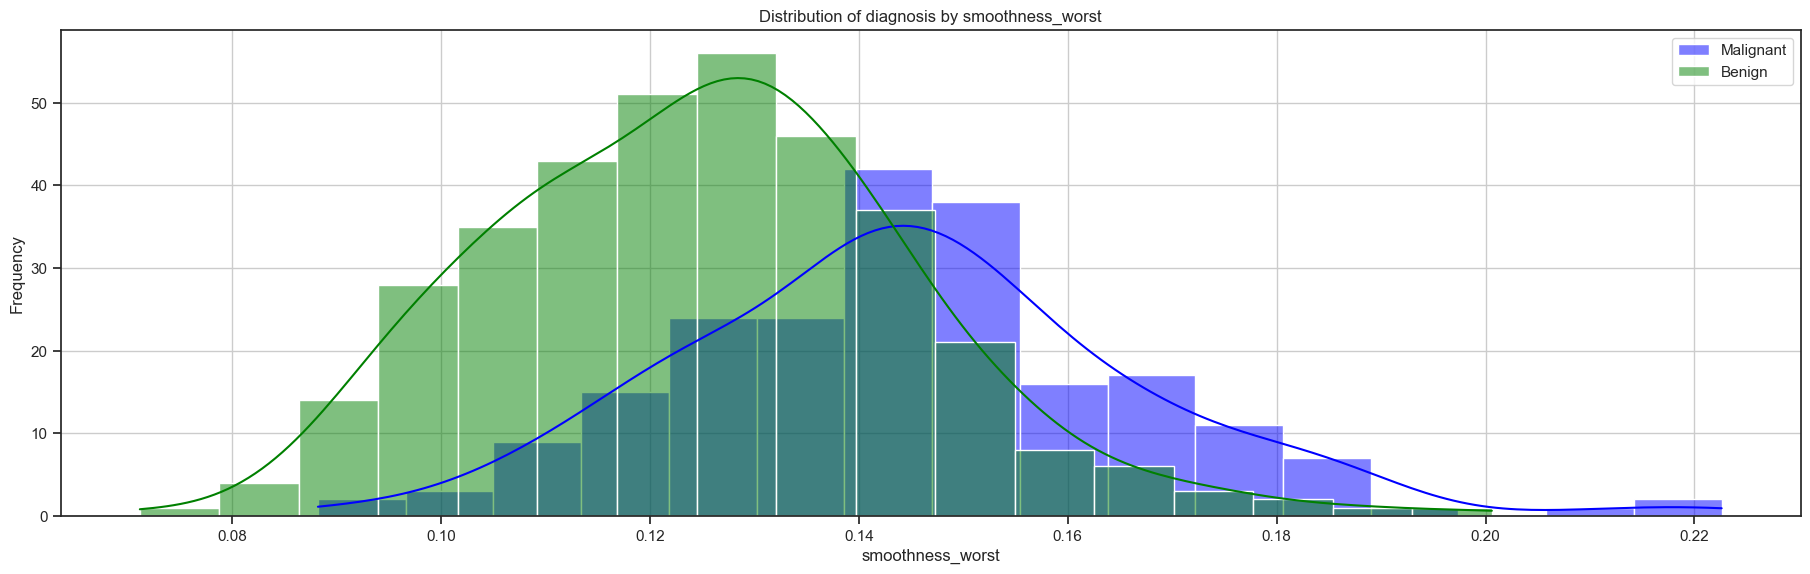



concave points_worst:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


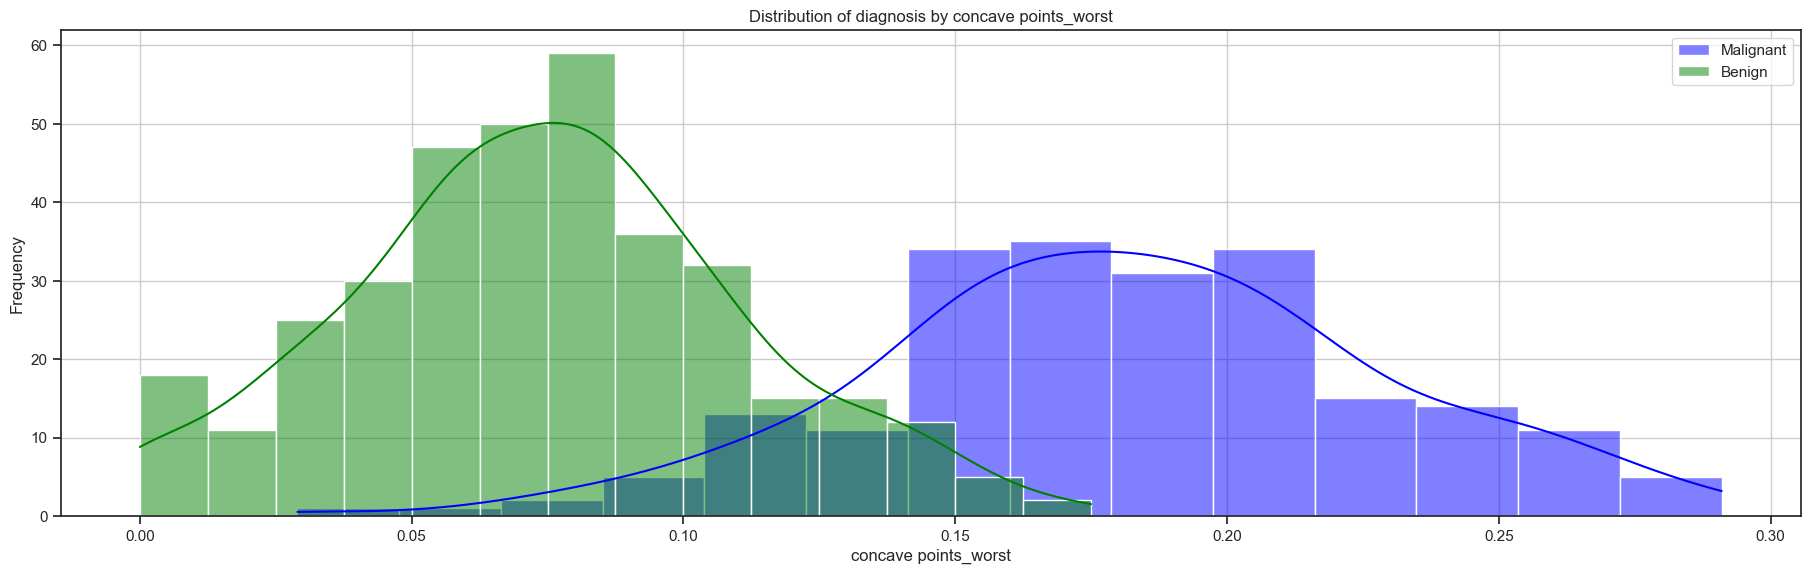

In [23]:
# t-test
import scipy.stats as stats

skewness_values = con_df.skew()
test_columns = skewness_values[abs(skewness_values) < 0.5].index.tolist()

for col in test_columns:
    benign = df[df['diagnosis'] == 0][col]
    malignant = df[df['diagnosis'] == 1][col]
    t_stat, p_val = stats.ttest_ind(malignant, benign, equal_var=True)

    print(f"\n\n{col}:")
    print('t-statistic:', t_stat)
    print('p-value:', p_val)

    plt.figure(figsize=(20, 6))
    sb.histplot(malignant, kde=True, color='blue', label='Malignant', alpha=0.5)
    sb.histplot(benign, kde=True, color='green', label='Benign', alpha=0.5)
    plt.title(f"Distribution of diagnosis by {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()



## nonparametric features  - use the Wilcoxon rank-sum test 

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


radius_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


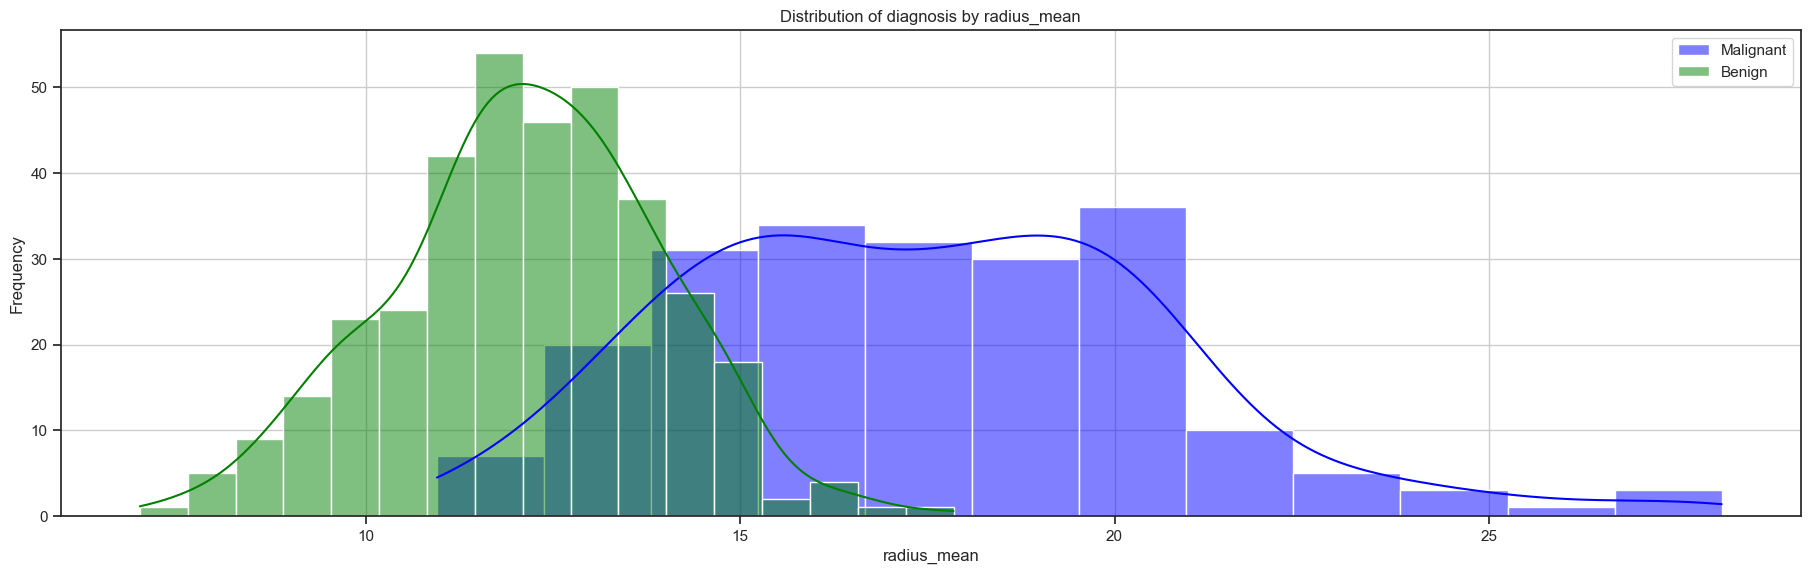



texture_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


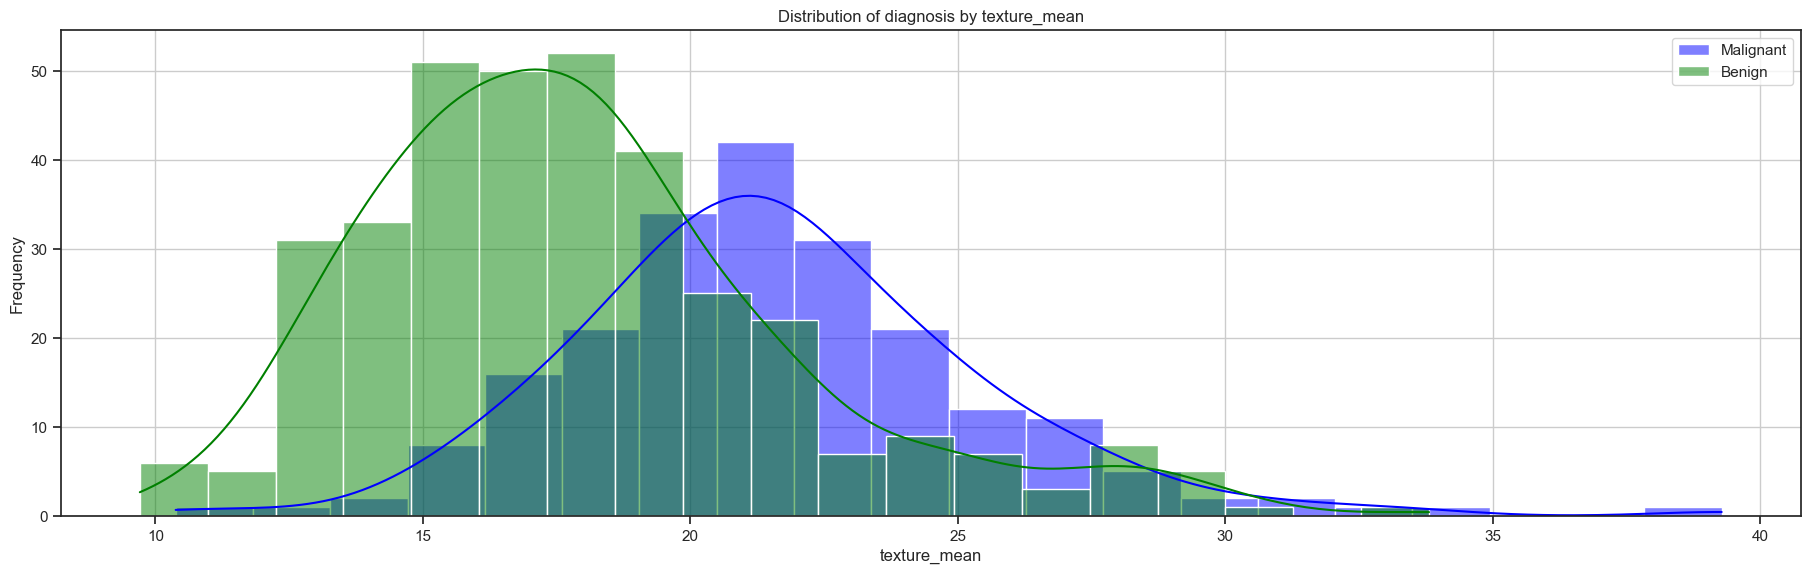



perimeter_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


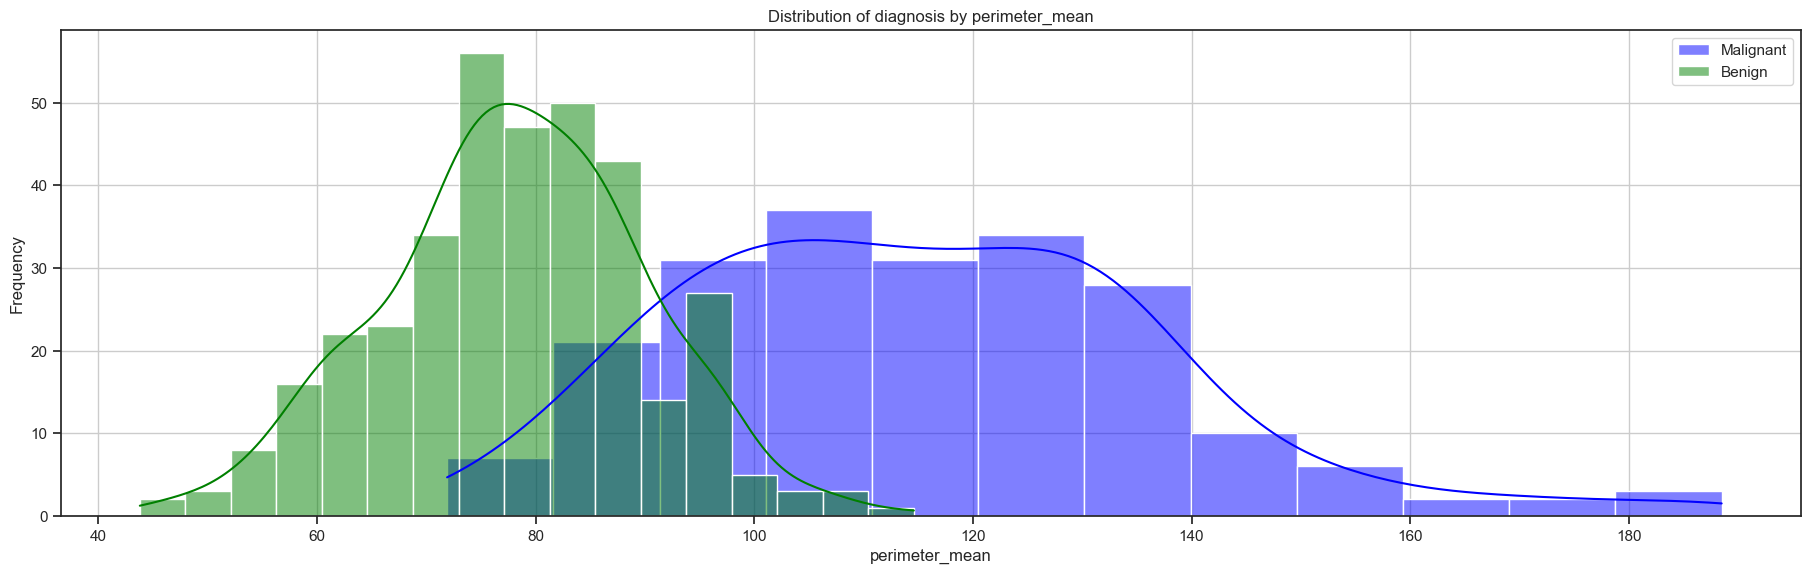



area_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


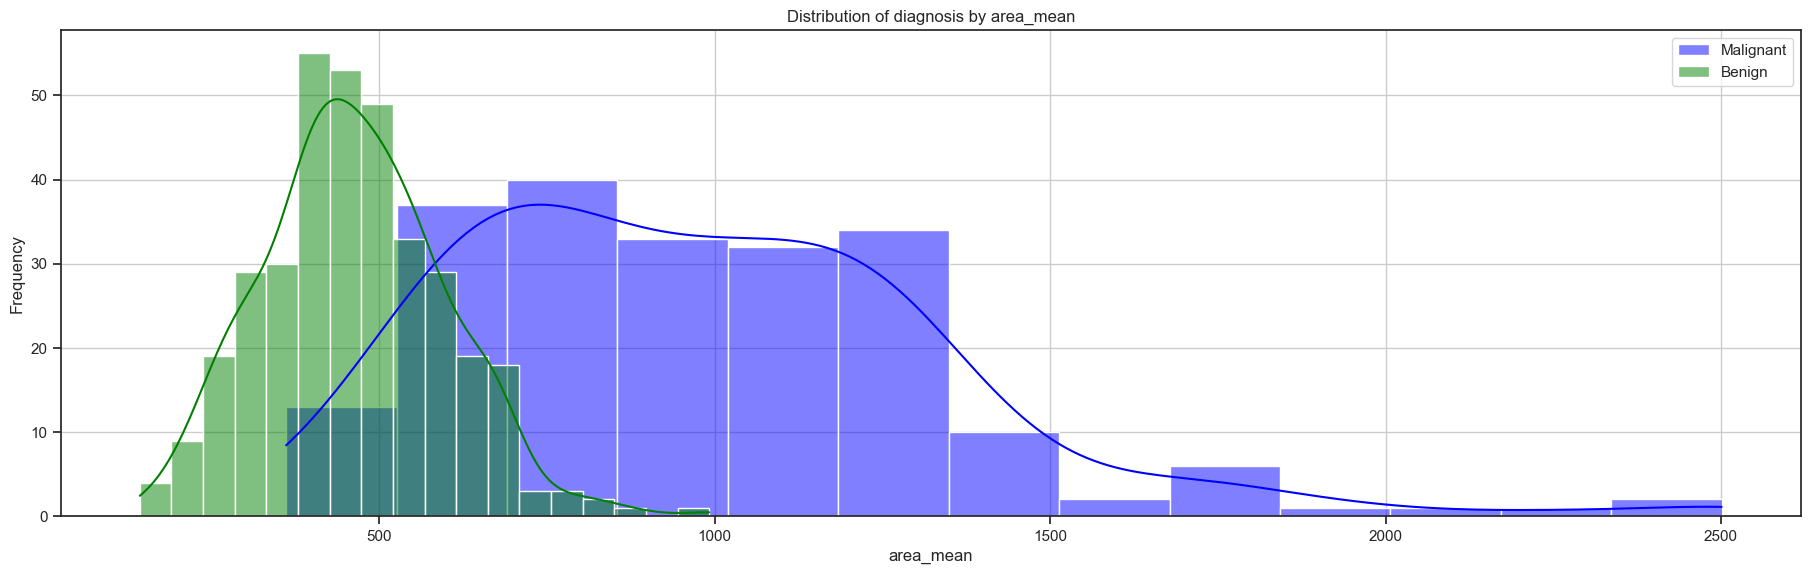



compactness_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


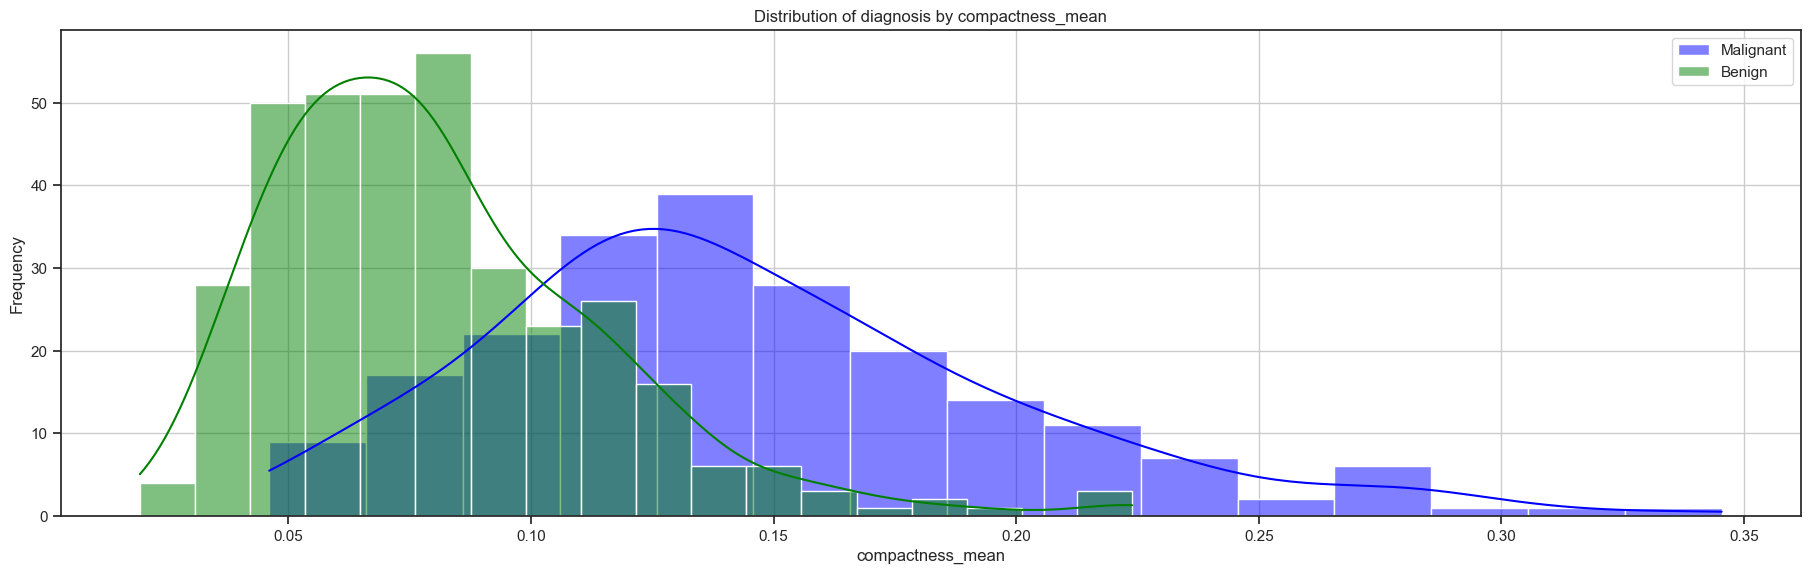



concavity_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


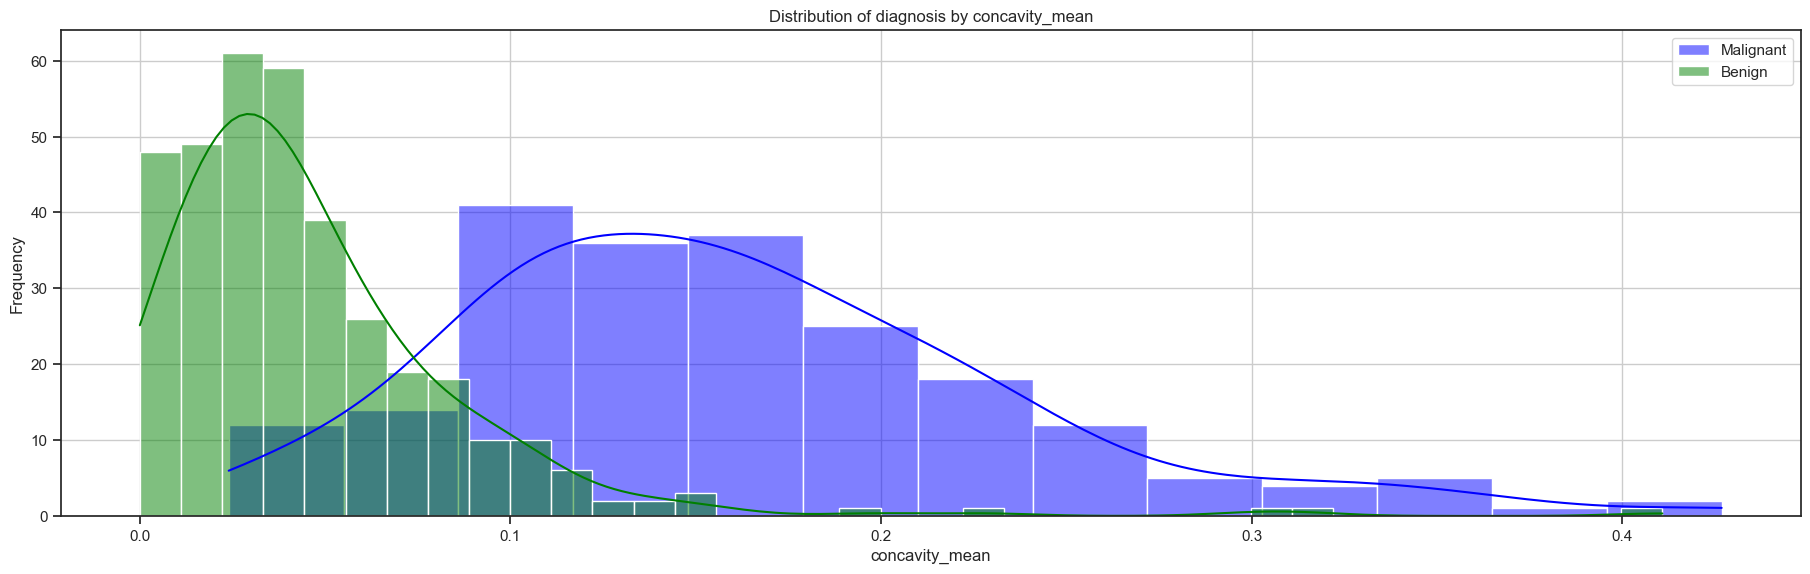



concave points_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


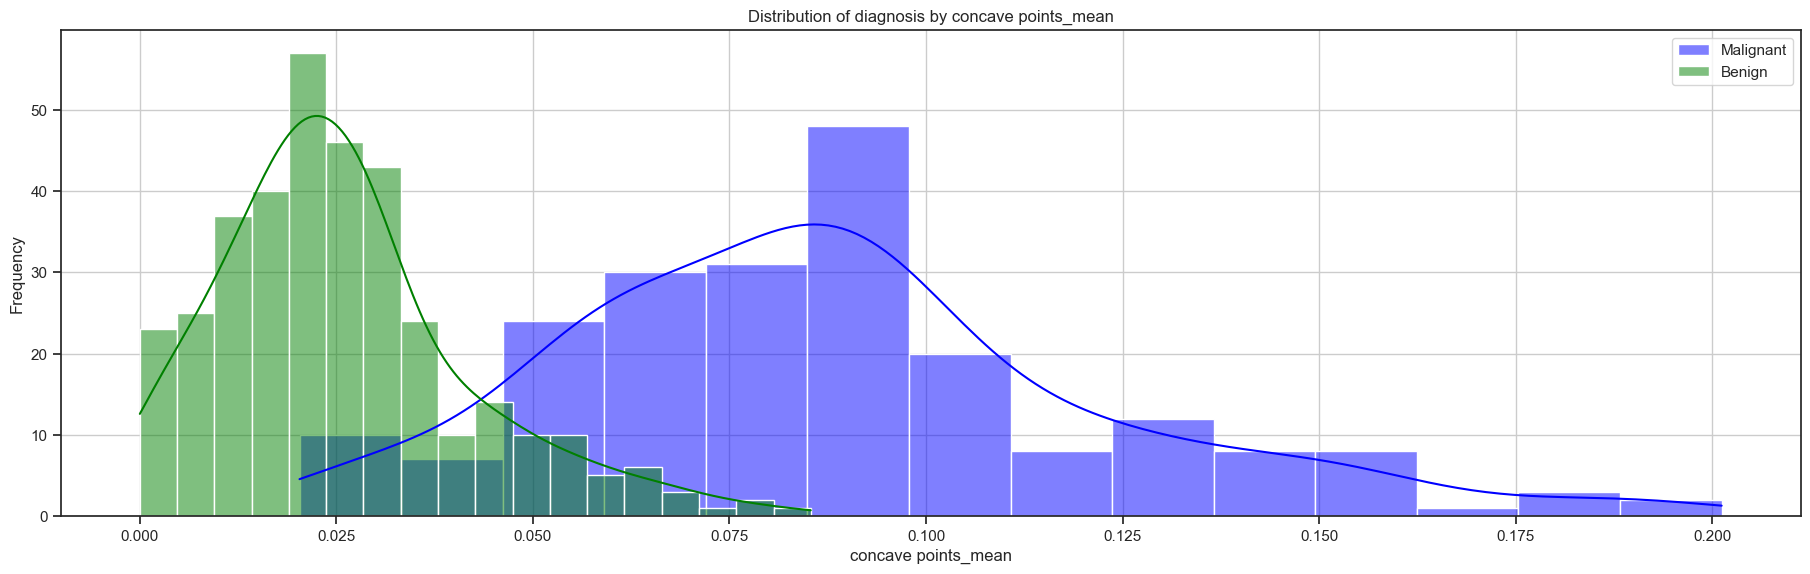



symmetry_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


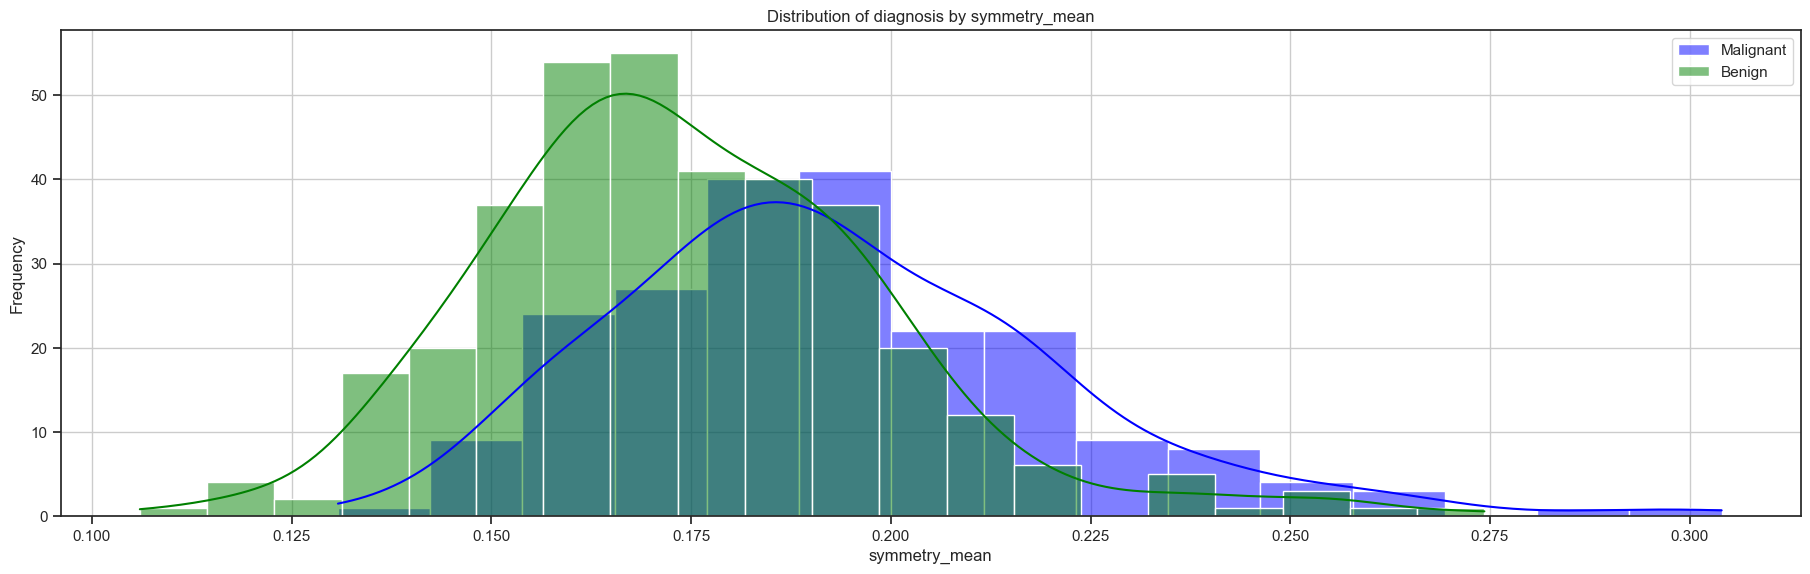



fractal_dimension_mean:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


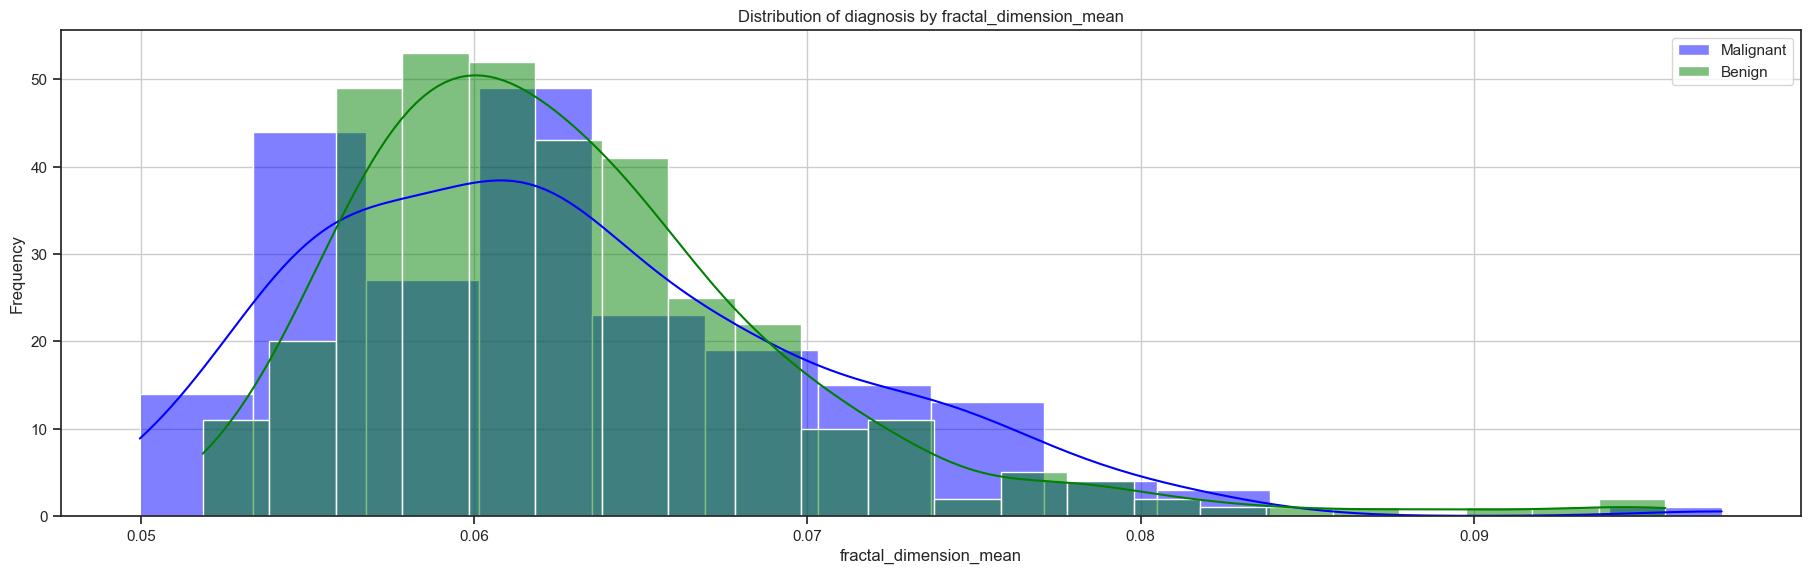



radius_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


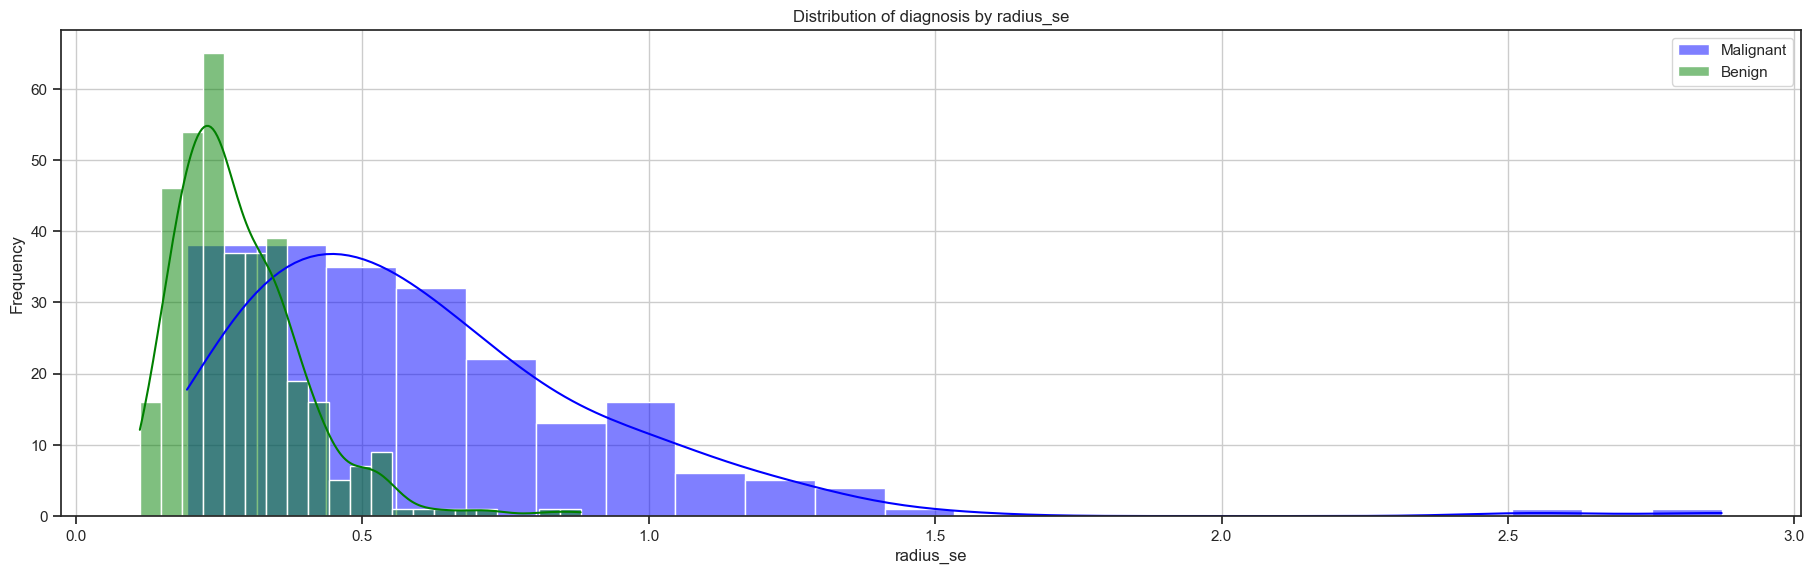



texture_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


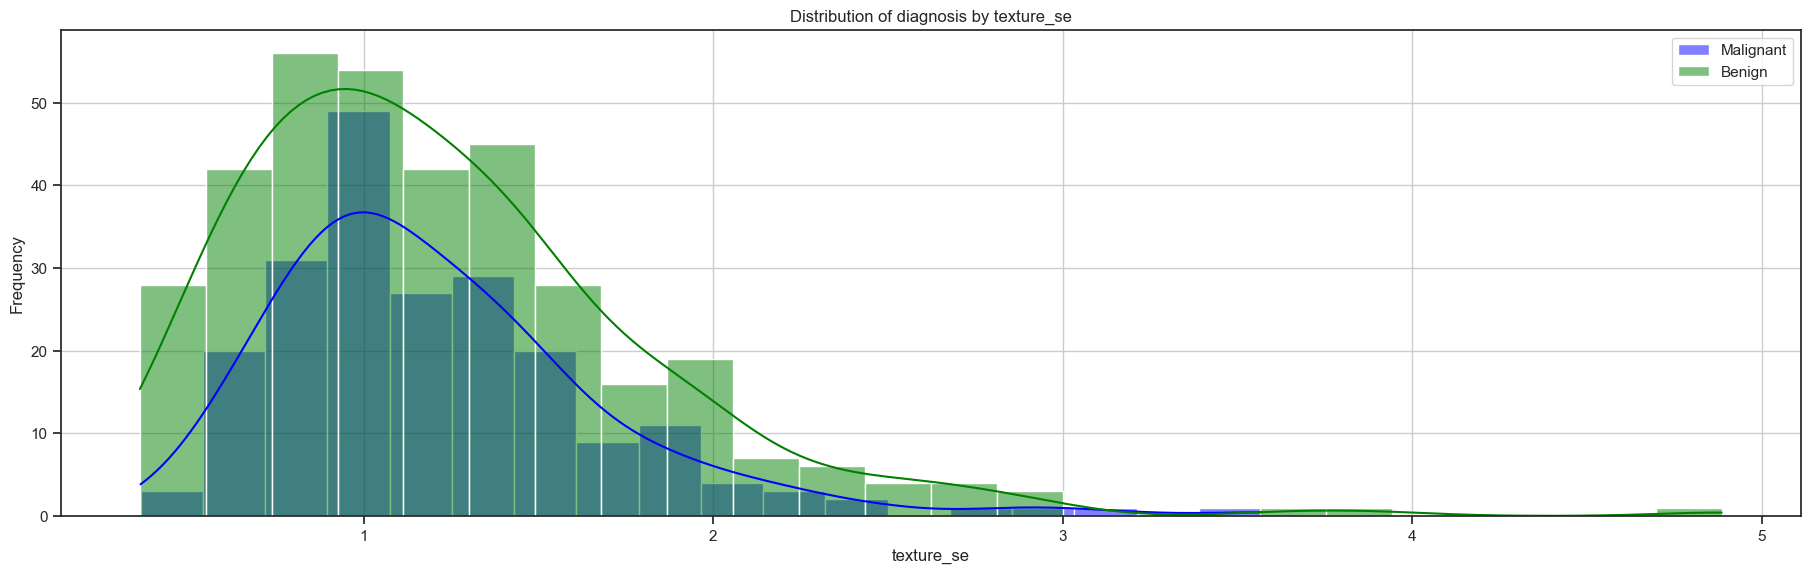



perimeter_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


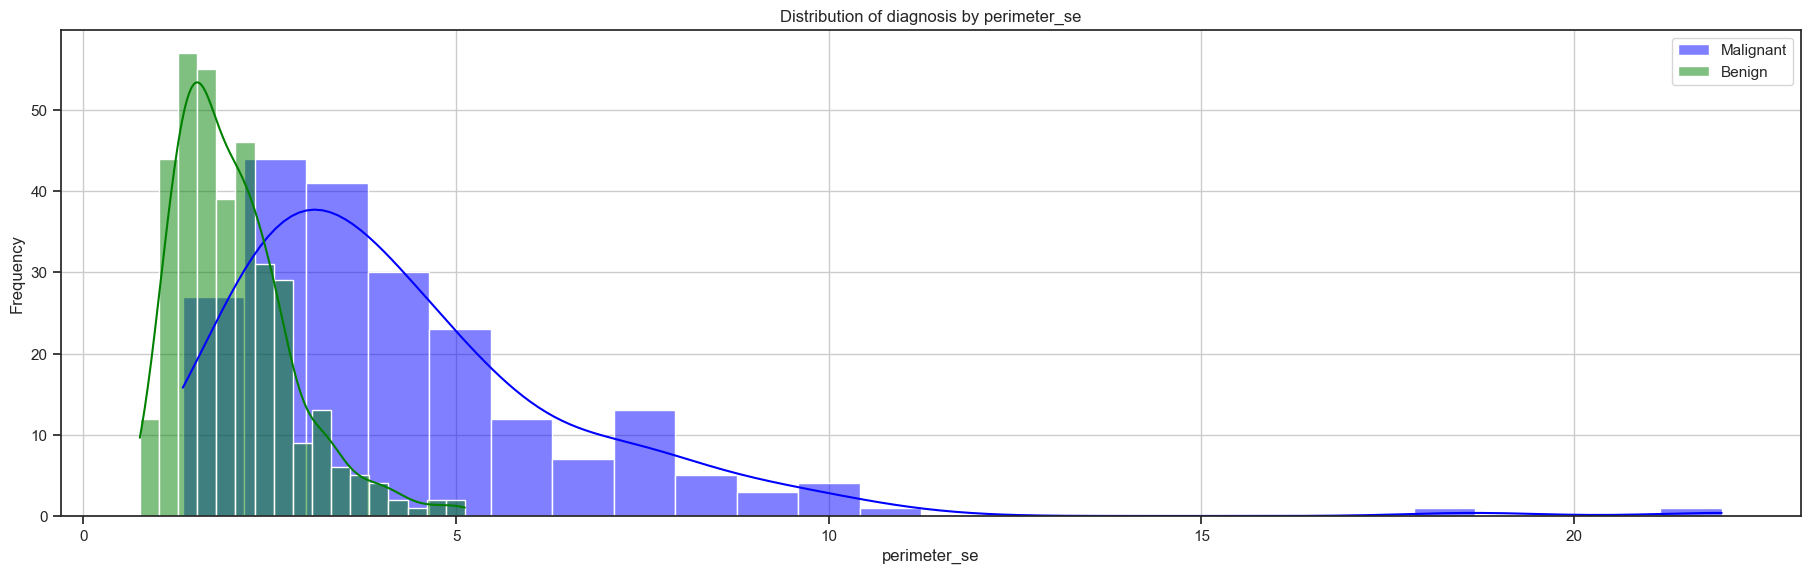



area_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


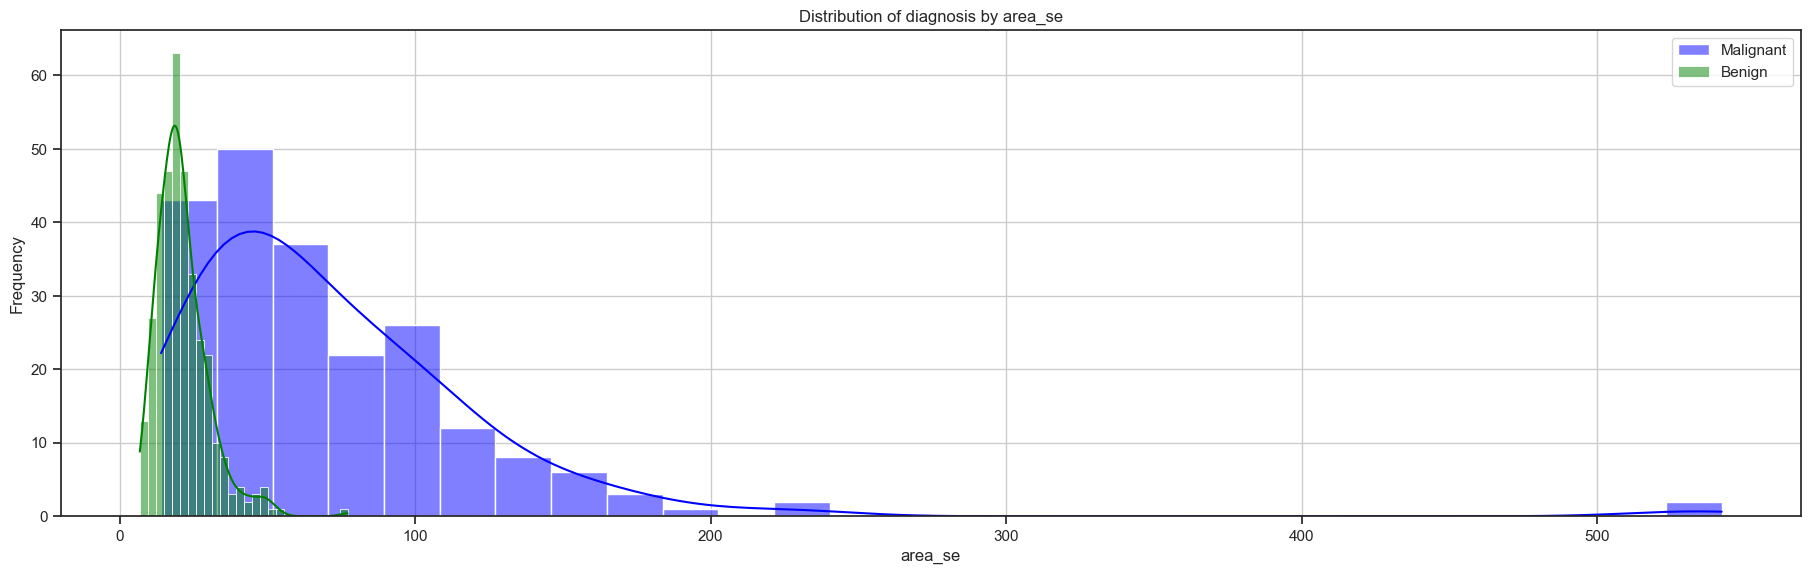



smoothness_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


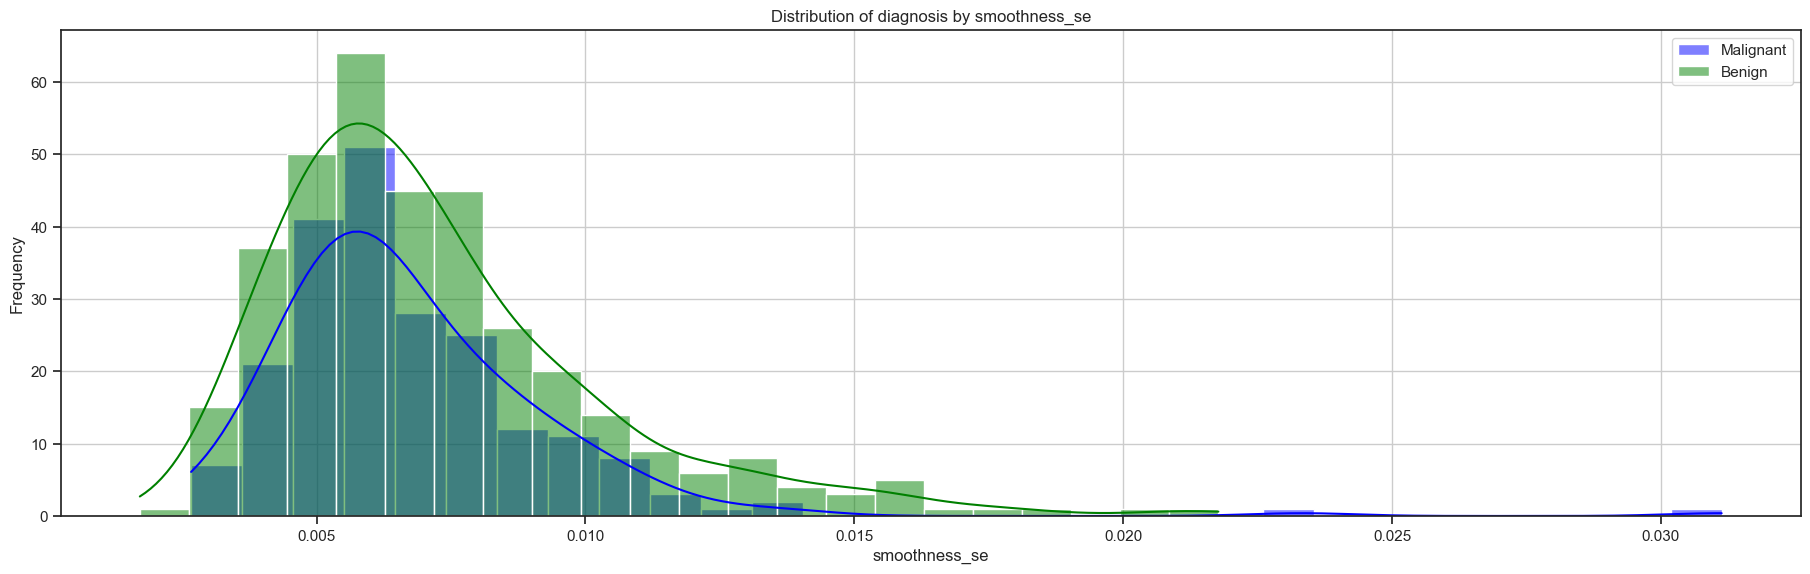



compactness_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


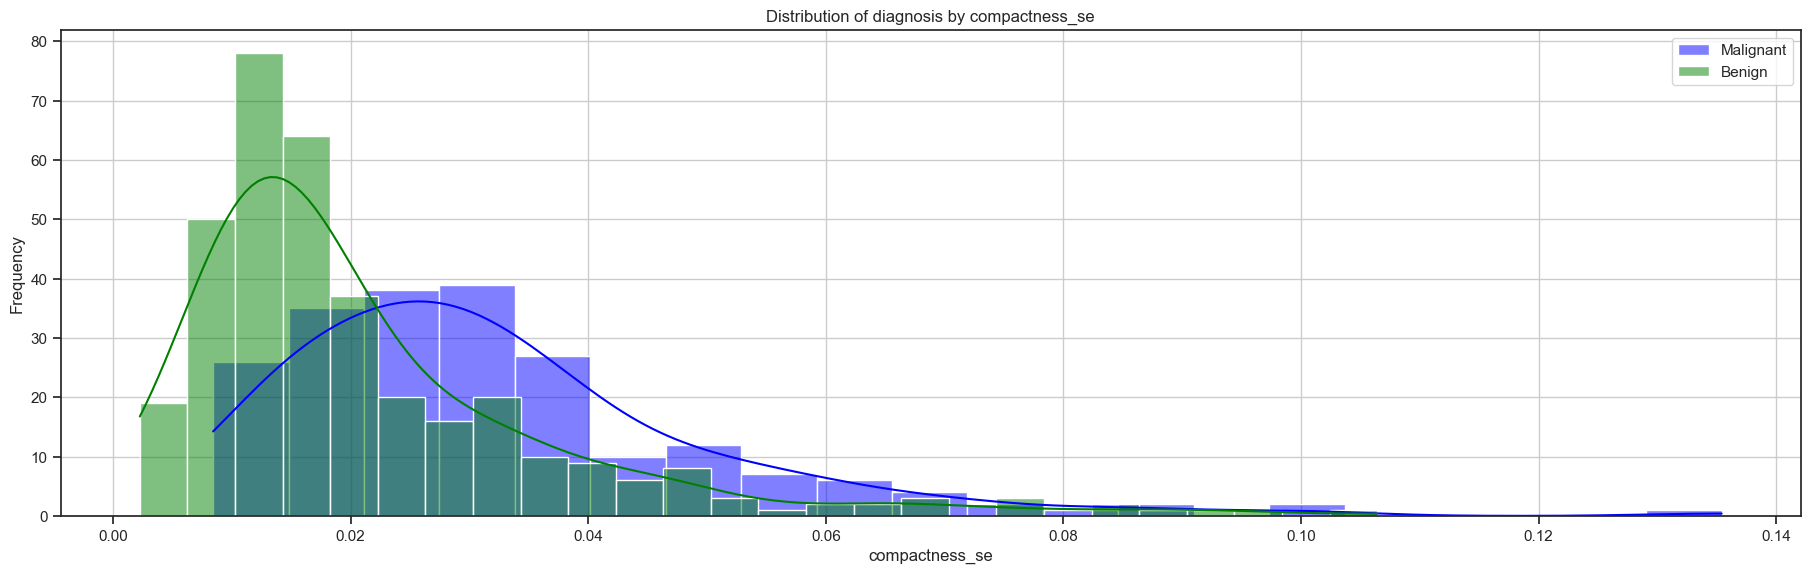



concavity_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


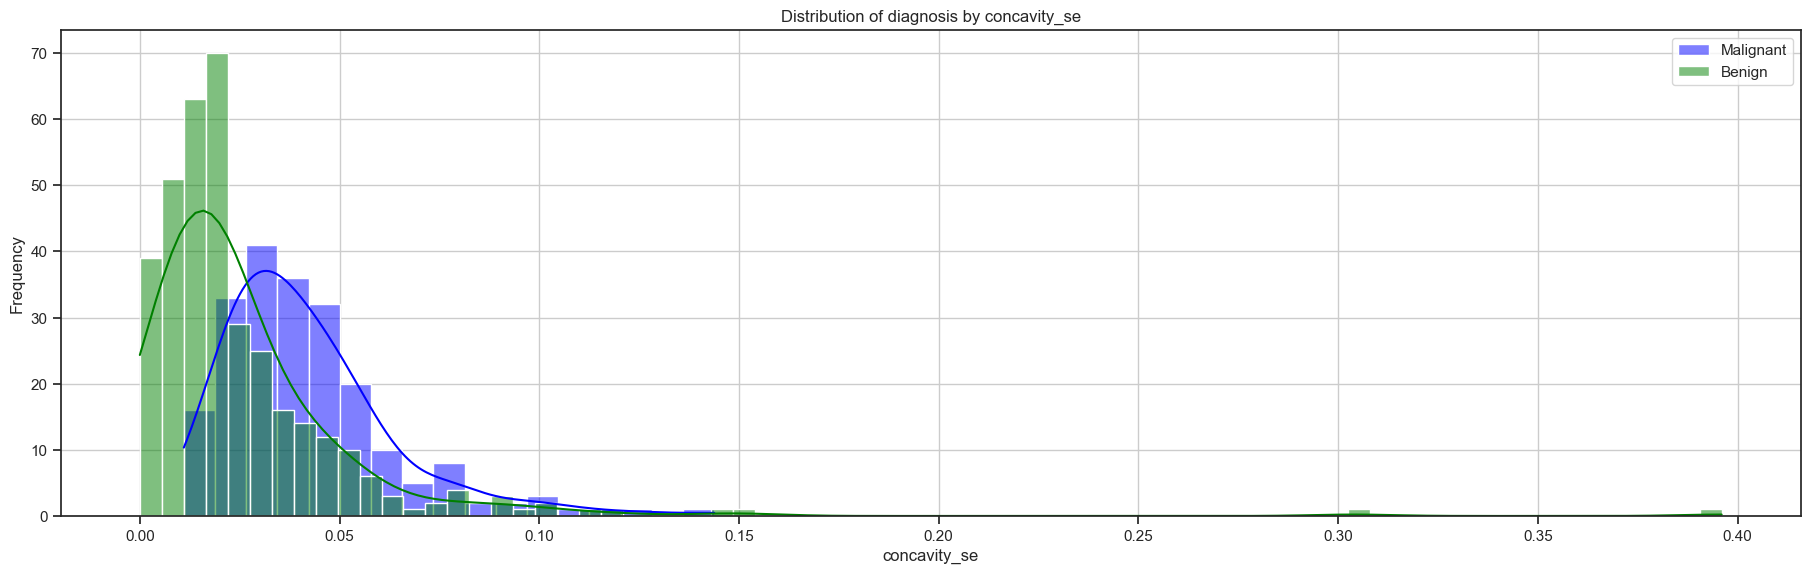



concave points_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


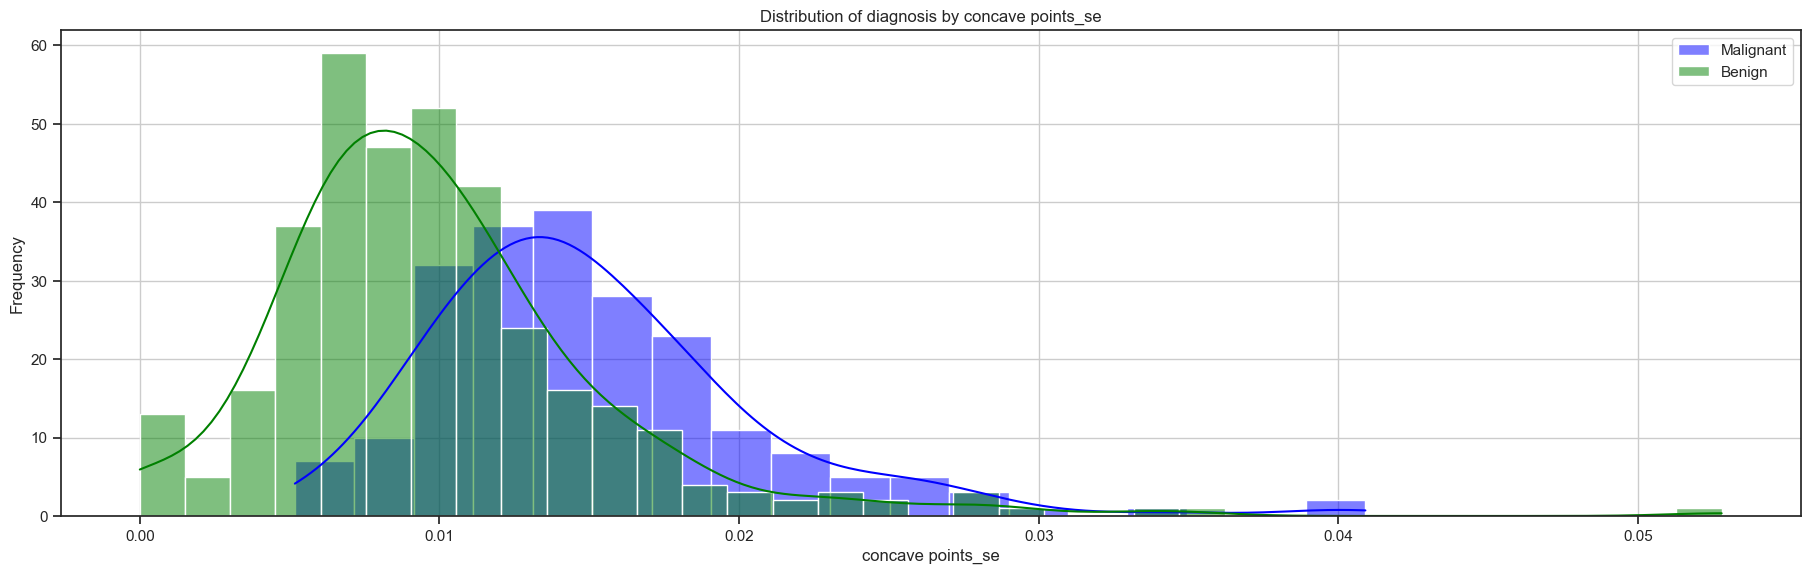



symmetry_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


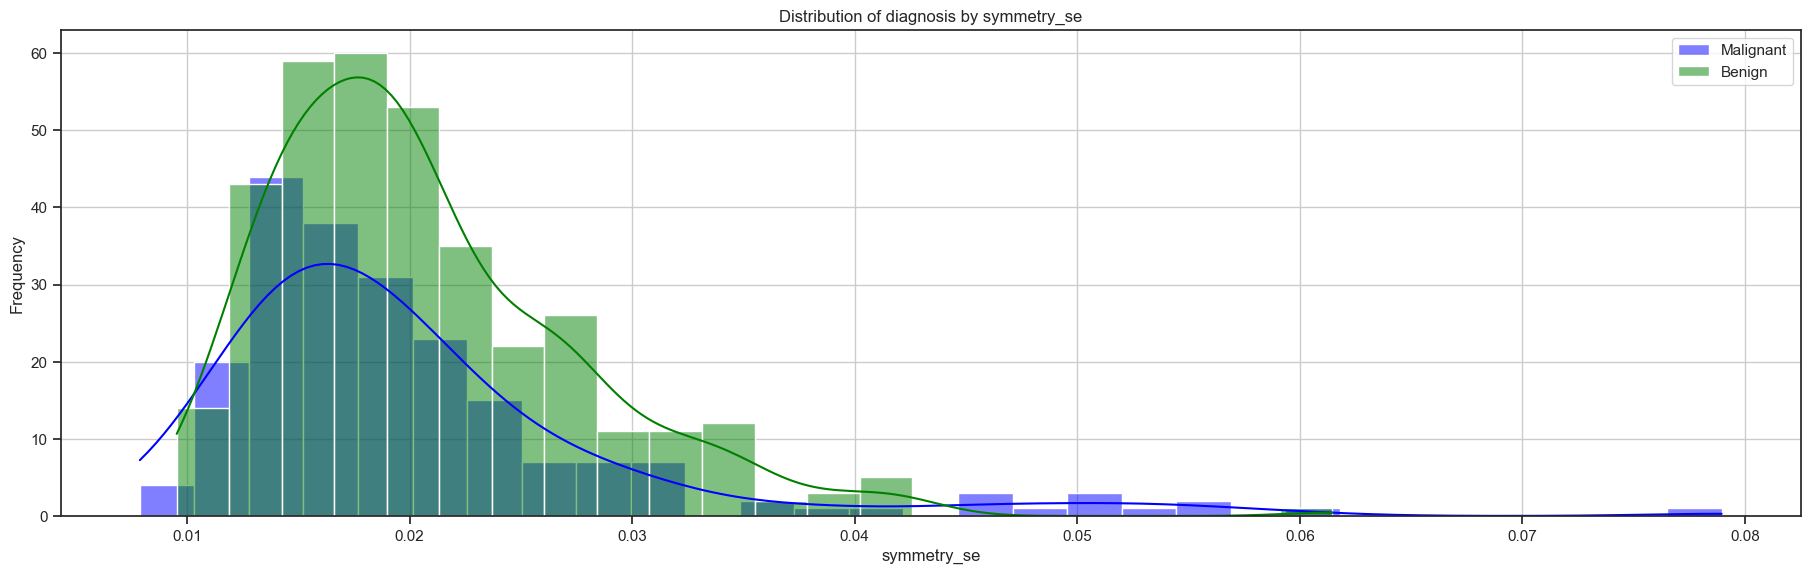



fractal_dimension_se:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


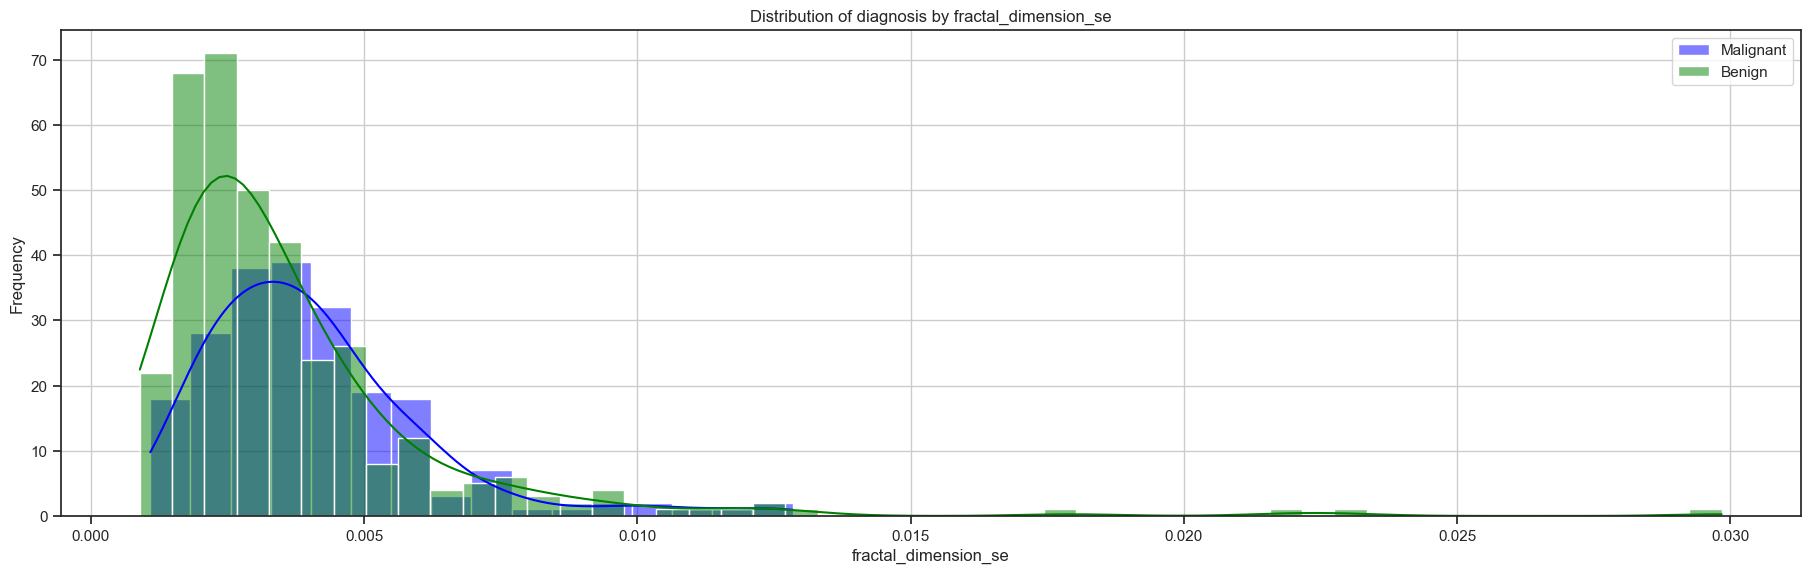



radius_worst:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


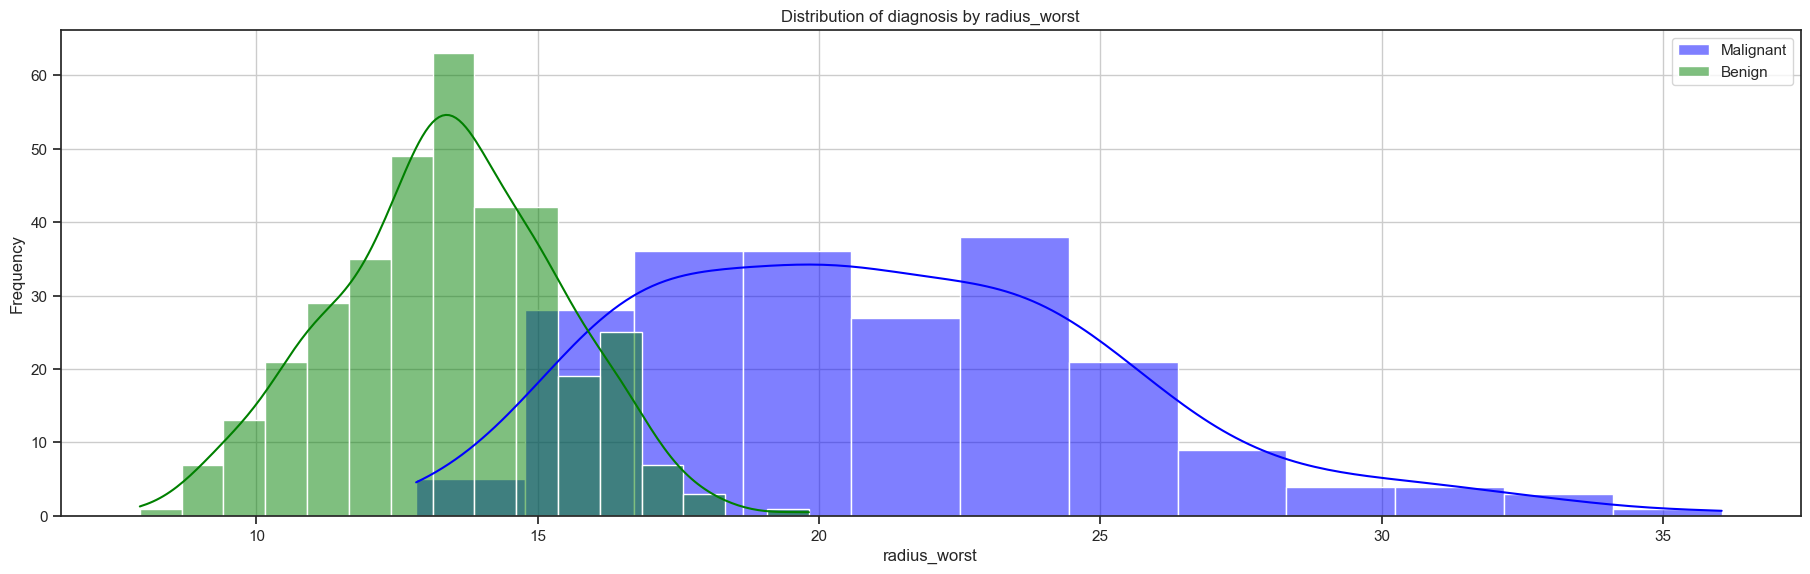



perimeter_worst:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


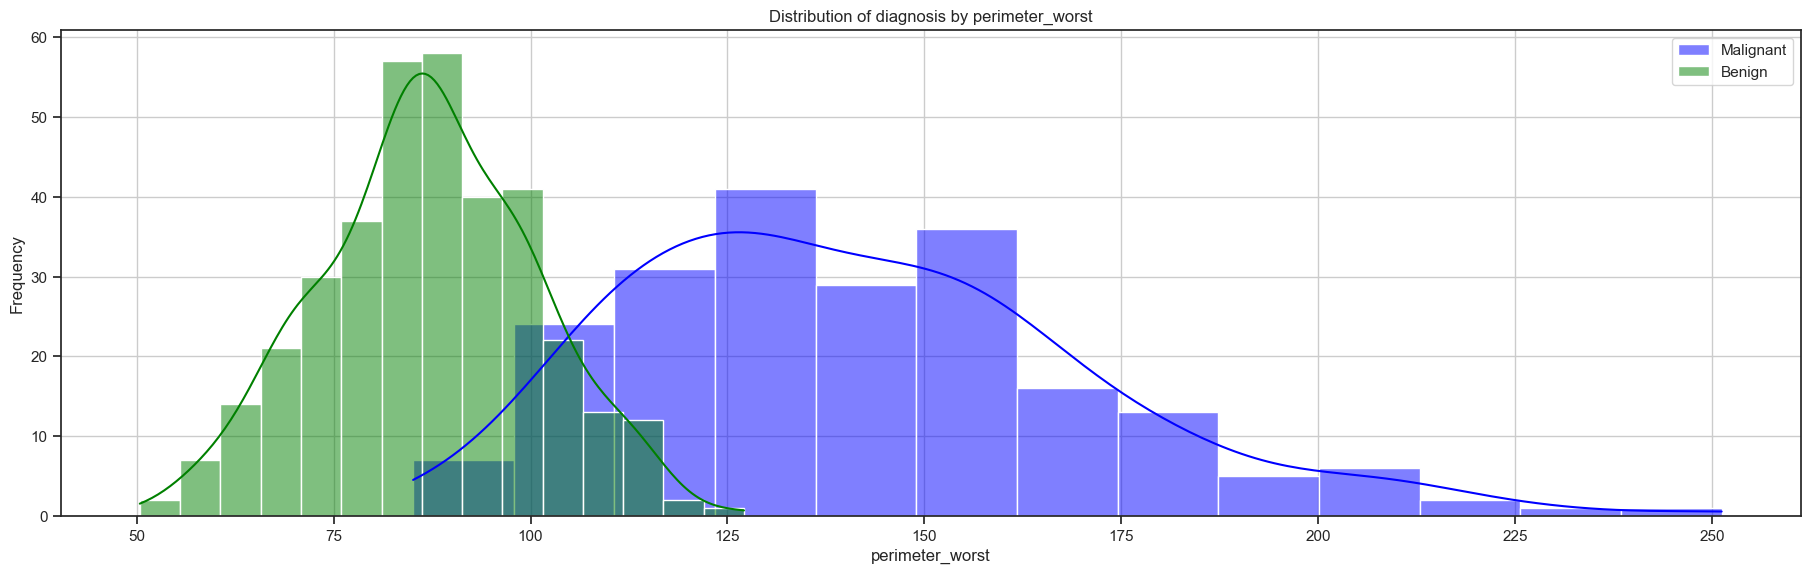



area_worst:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


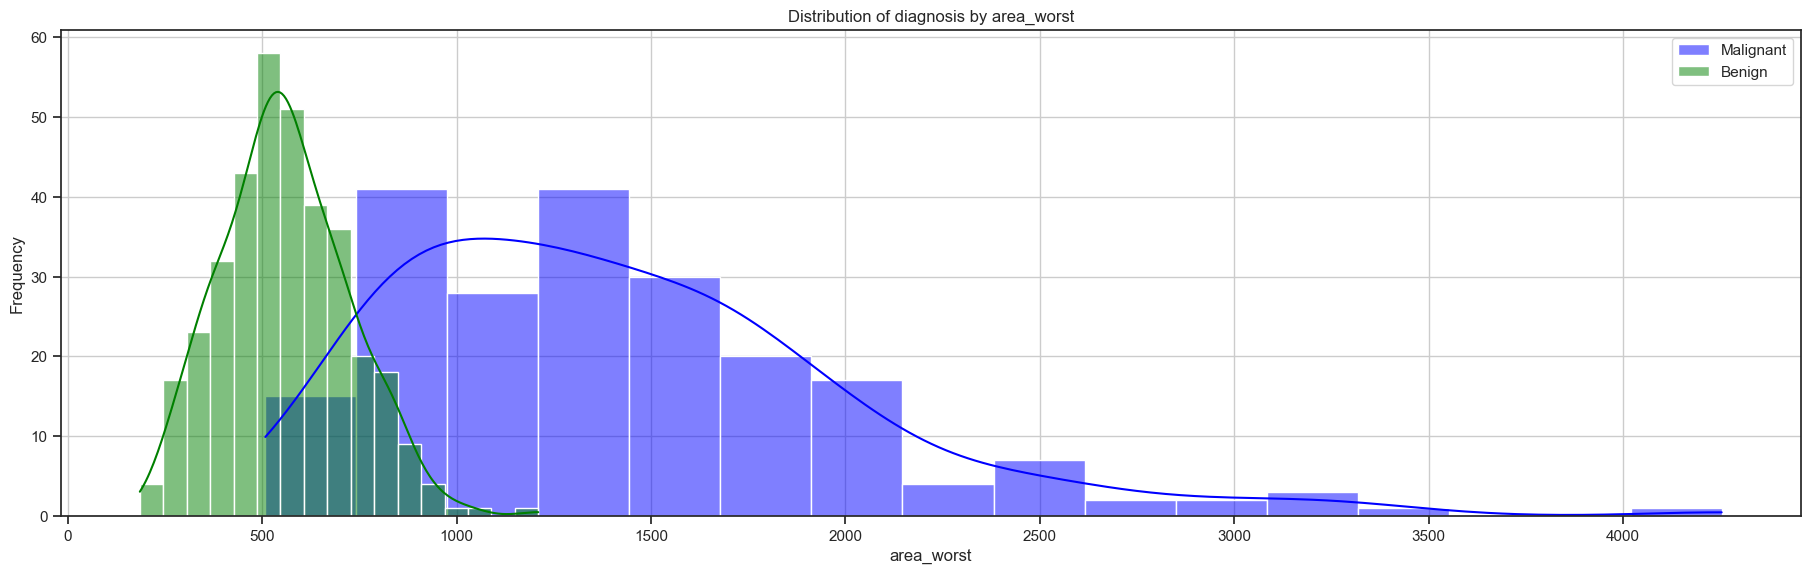



compactness_worst:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


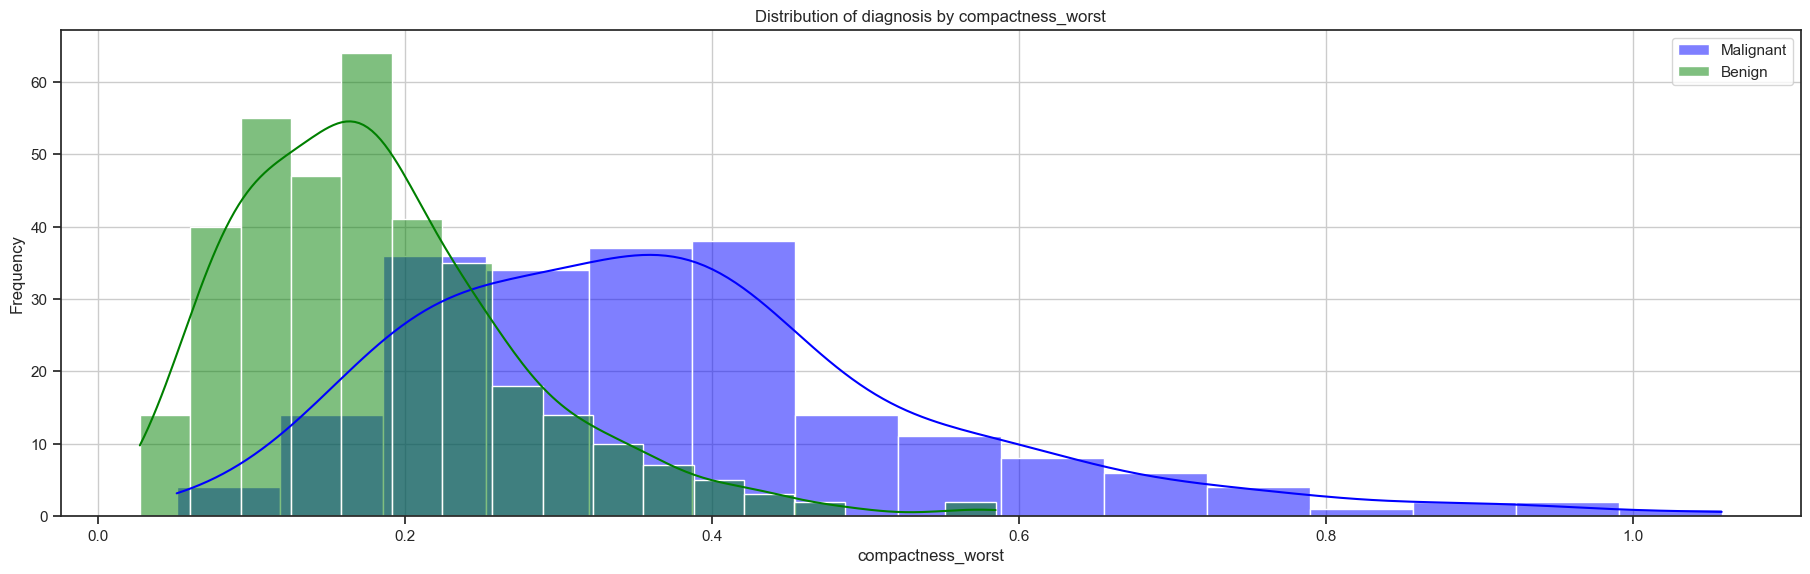



concavity_worst:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


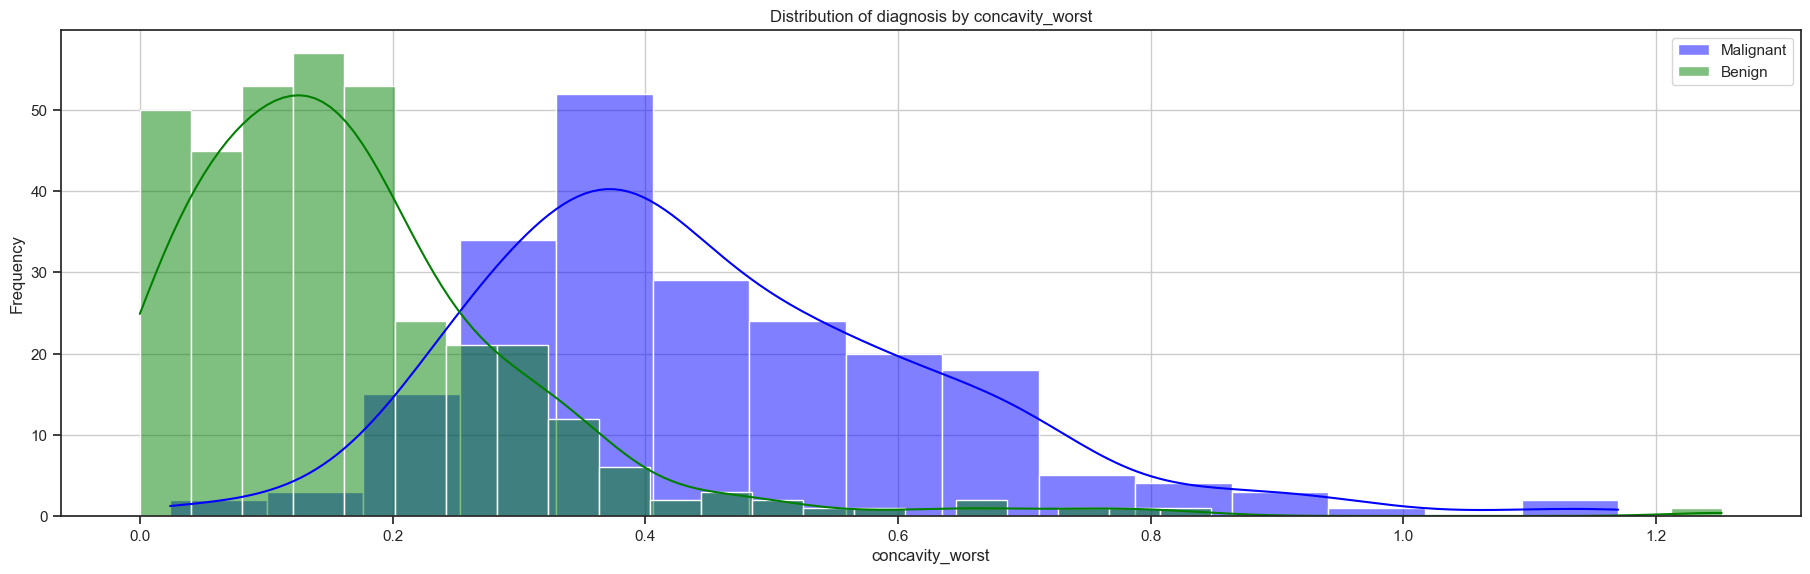



symmetry_worst:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


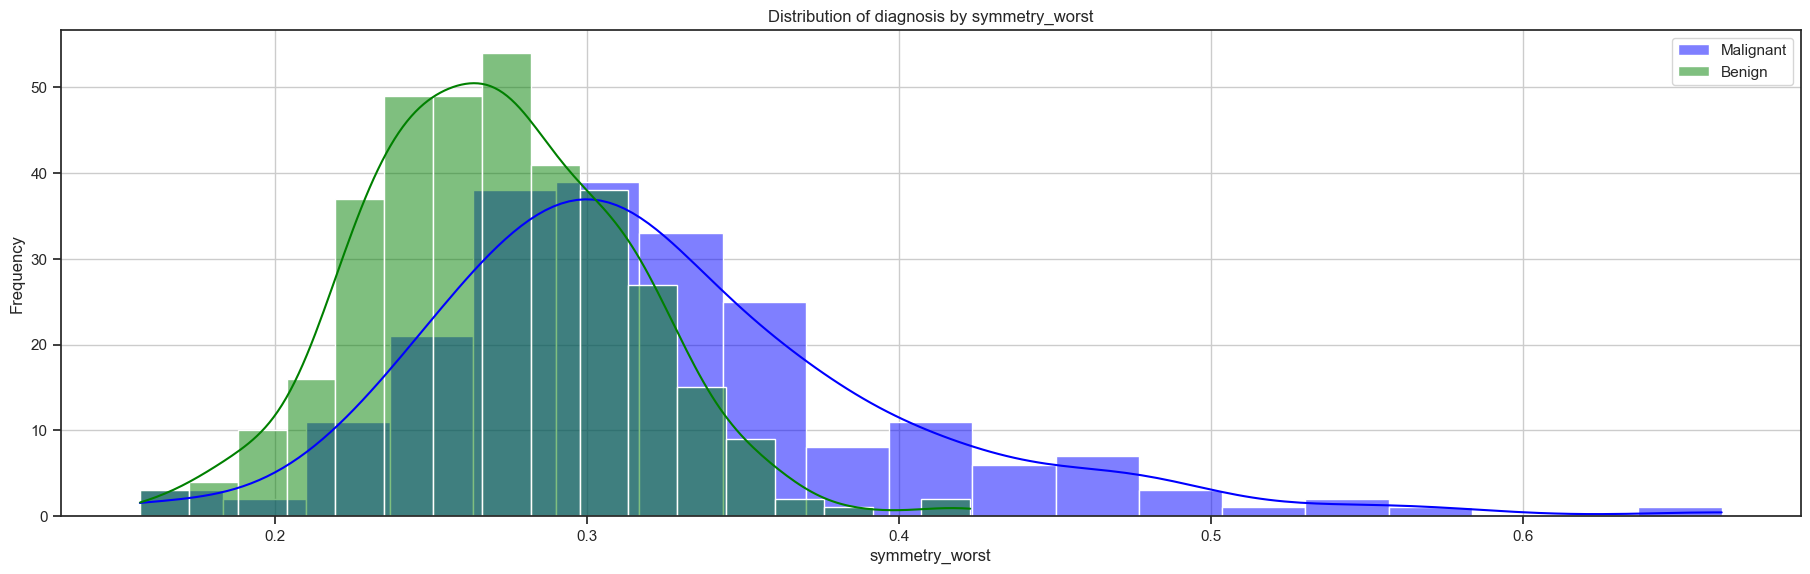



fractal_dimension_worst:
t-statistic: 31.054555115984236
p-value: 1.9690997072164375e-124


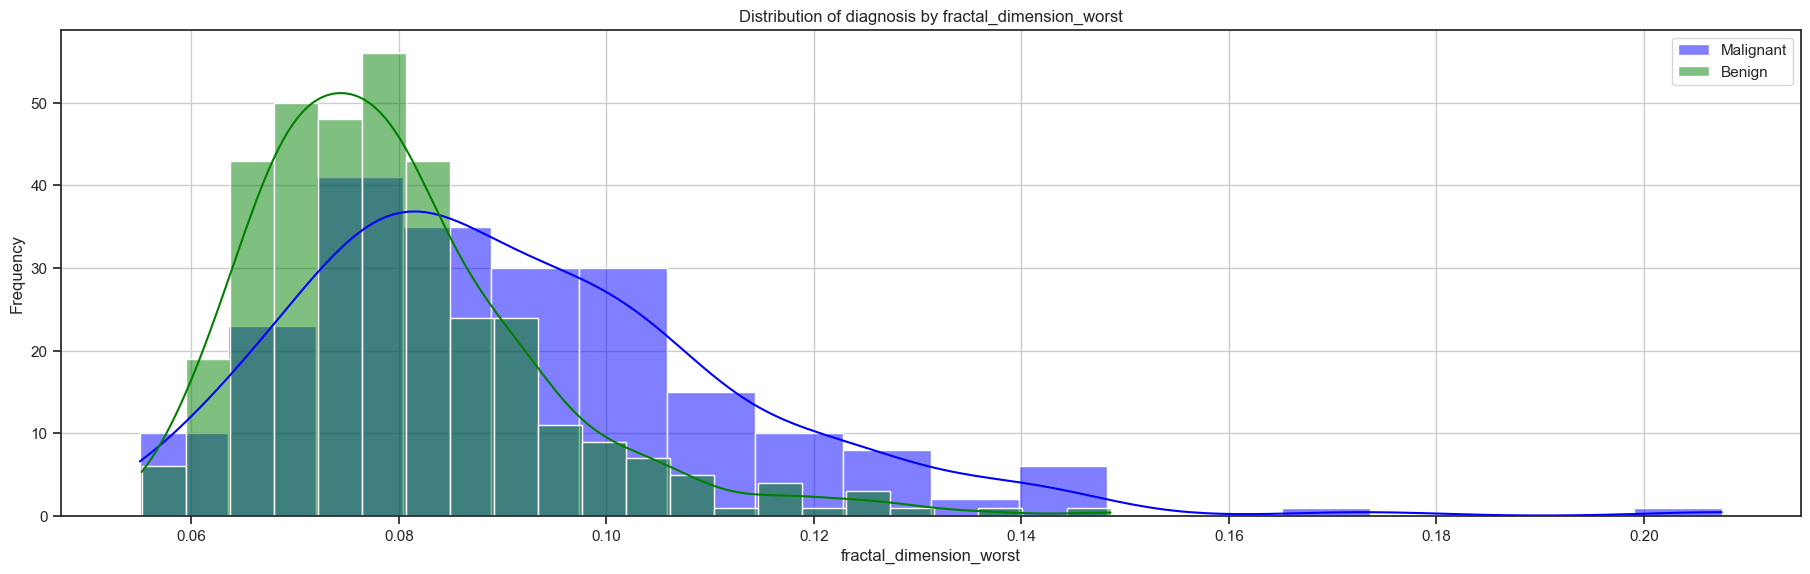

In [47]:
from scipy.stats import ranksums
# Step 1: Prepare to hold the results for the Wilcoxon rank-sum test
results = []

non_para_columns = skewness_values[abs(skewness_values) >= 0.5].index.tolist()
print(non_para_columns)
# Step 2: Perform the Wilcoxon rank-sum test for each feature
for col in non_para_columns:
    benign = df[df['diagnosis'] == 0][col] # Benign group
    malignant = df[df['diagnosis'] == 1][col] # Malignant group

    # Perform the Wilcoxon rank-sum test
    stat, p_value = ranksums(benign, malignant)
    print(f"\n\n{col}:")
    print('t-statistic:', t_stat)
    print('p-value:', p_val)

    plt.figure(figsize=(20, 6))
    sb.histplot(malignant, kde=True, color='blue', label='Malignant', alpha=0.5)
    sb.histplot(benign, kde=True, color='green', label='Benign', alpha=0.5)
    plt.title(f"Distribution of diagnosis by {col}")
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

In [26]:

df.to_pickle('df_prep.pkl')

In [27]:
df

id     diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302      1         17.99         10.38         122.80       
1      842517      1         20.57         17.77         132.90       
2    84300903      1         19.69         21.25         130.00       
3    84348301      1         11.42         20.38          77.58       
4    84358402      1         20.29         14.34         135.10       
..        ...        ...          ...           ...             ...   
564    926424      1         21.56         22.39         142.00       
565    926682      1         20.13         28.25         131.20       
566    926954      1         16.60         28.08         108.30       
567    927241      1         20.60         29.33         140.10       
568     92751      0          7.76         24.54          47.92       

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     1001.0        0.11840           0.27760          0.30010      
1     1326.0        0.08474           0.07864          0.08690      
2     1203.0        0.10960           0.15990          0.19740      
3      386.1        0.14250           0.28390          0.24140      
4     1297.0        0.10030           0.13280          0.19800      
..         ...              ...               ...             ...   
564   1479.0        0.11100           0.11590          0.24390      
565   1261.0        0.09780           0.10340          0.14400      
566    858.1        0.08455           0.10230          0.09251      
567   1265.0        0.11780           0.27700          0.35140      
568    181.0        0.05263           0.04362          0.00000      

     concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0          0.14710           0.2419              0.07871          1.0950     
1          0.07017           0.1812              0.05667          0.5435     
2          0.12790           0.2069              0.05999          0.7456     
3          0.10520           0.2597              0.09744          0.4956     
4          0.10430           0.1809              0.05883          0.7572     
..                   ...            ...                     ...        ...   
564        0.13890           0.1726              0.05623          1.1760     
565        0.09791           0.1752              0.05533          0.7655     
566        0.05302           0.1590              0.05648          0.4564     
567        0.15200           0.2397              0.07016          0.7260     
568        0.00000           0.1587              0.05884          0.3857     

     texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
0      0.9053        8.589     153.40     0.006399         0.04904      
1      0.7339        3.398      74.08     0.005225         0.01308      
2      0.7869        4.585      94.03     0.006150         0.04006      
3      1.1560        3.445      27.23     0.009110         0.07458      
4      0.7813        5.438      94.44     0.011490         0.02461      
..          ...           ...      ...            ...             ...   
564    1.2560        7.673     158.70     0.010300         0.02891      
565    2.4630        5.203      99.04     0.005769         0.02423      
566    1.0750        3.425      48.55     0.005903         0.03731      
567    1.5950        5.772      86.22     0.006522         0.06158      
568    1.4280        2.548      19.15     0.007189         0.00466      

     concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
0       0.05373         0.01587         0.03003          0.006193         
1       0.01860         0.01340         0.01389          0.003532         
2       0.03832         0.02058         0.02250          0.004571         
3       0.05661         0.01867         0.05963          0.009208         
4       0.05688         0.01885         0.01756          0.005115         
..            ...                ...          ...             